## Цель проекта

Разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке коровы

Описание данных:

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент:

id — уникальный идентификатор коровы.
Удой, кг — масса молока, которую корова даёт в год (в килограммах).
ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
Сырой протеин, г — содержание сырого протеина в корме (в граммах).
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Жирность,% — содержание жиров в молоке (в процентах).
Белок,% — содержание белков в молоке (в процентах).
Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера:

id — уникальный идентификатор коровы.
Имя Папы — имя папы коровы.
Файл cow_buy.csv содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:

Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Имя_папы — имя папы коровы.
Текущая_жирность,% — содержание жиров в молоке (в процентах).
Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


План действий:

1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Проведите корреляционный анализ признаков в датасете ferma_main.csv
5. Задача регрессии
6. Задача классификации
7. Общий вывод

## Загрузка данных

### Загрузим необходимые библиотеки для выполнения проекта

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder ,
    StandardScaler
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score
)
!pip install phik -q
import phik

### Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas

In [2]:
df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

display(df_ferma_main.head())
display(df_ferma_dad.head())
display(df_cow_buy.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Изучим общую инфомрацию о данных

In [3]:
print(df_ferma_main.info())
print()
print(df_ferma_dad.info())
print()
print(df_cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

### Вывод по главе 

Можно сделать вывод, что :

I. Для датафрейма - df_ferma_main:

1) Явных пропусков в данных не обнаружено
2) Нужно поменять тип данных в следующих столбцах: ЭКЕ (Энергетическая кормовая единица), СПО (Сахаро-протеиновое соотношение), Жирность,%, Белок,% 
3) Данные столбцы могут содержать неявные дубликаты, проверим ниже : Порода , Тип пастбища , порода папы_быка, Вкус молока, Возраст
5) Так же переведем названия столбцов в нижний регистр

II. Для датафрейма - df_ferma_dad:

1) Явных пропусков в данных не обнаружено
2) Проверим на адекватность знаяения в столбце Имя Папы
3) Так же переведем названия столбцов в нижний регистр

III. Для датафрейма - df_cow_buy:

1) Явных пропусков в данных не обнаружено
2) Нужно поменять тип данных в следующих столбцах: Текущая_жирность,%  , Текущий_уровень_белок,%
3) Данные столбцы могут содержать неявные дубликаты, проверим ниже : Порода , Тип пастбища , порода папы_быка, Возраст


##  Предобработка данных

### Приведем к нижнему регистру названия столбцов

In [4]:
df_ferma_main = df_ferma_main.rename(columns={'Удой, кг':'удой_кг', 'ЭКЕ (Энергетическая кормовая единица)':'эке', 'Сырой протеин, г':'сырой_протеин_г','СПО (Сахаро-протеиновое соотношение)':'спо','Порода':'порода','Тип пастбища':'тип_пастбища','Жирность,%':'жирность_%','Белок,%':'белок_%','Вкус молока':'вкус_молока','Возраст':'возраст','порода папы_быка':'порода_папы_быка'})
df_ferma_dad = df_ferma_dad.rename(columns={'Имя Папы':'имя_папы'})
df_cow_buy = df_cow_buy.rename(columns={'Порода':'порода', 'Тип пастбища':'тип_пастбища', 'Сырой протеин, г':'сырой_протеин_г', 'порода папы_быка':'порода_папы_быка','Имя_папы':'имя_папы','Текущая_жирность,%':'текущая_жирность_%','Текущий_уровень_белок,%':'текущий_уровень_белок_%','Возраст':'возраст'})

print(df_ferma_main.info())
print()
print(df_ferma_dad.info())
print()
print(df_cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   удой_кг           634 non-null    int64 
 2   эке               634 non-null    object
 3   сырой_протеин_г   634 non-null    int64 
 4   спо               634 non-null    object
 5   порода            634 non-null    object
 6   тип_пастбища      634 non-null    object
 7   порода_папы_быка  634 non-null    object
 8   жирность_%        634 non-null    object
 9   белок_%           634 non-null    object
 10  вкус_молока       634 non-null    object
 11  возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id       

### Изменение типов данных

In [5]:
df_ferma_main['эке'] = df_ferma_main['эке'].str.replace(',', '.').astype(float)
df_ferma_main['спо'] = df_ferma_main['спо'].str.replace(',', '.').astype(float)
df_ferma_main['жирность_%'] = df_ferma_main['жирность_%'].str.replace(',', '.').astype(float)
df_ferma_main['белок_%'] = df_ferma_main['белок_%'].str.replace(',', '.').astype(float)
df_cow_buy['текущая_жирность_%'] = df_cow_buy['текущая_жирность_%'].str.replace(',', '.').astype(float)
df_cow_buy['текущий_уровень_белок_%'] = df_cow_buy['текущий_уровень_белок_%'].str.replace(',', '.').astype(float)

print(df_ferma_main.info())
print()
print(df_ferma_dad.info())
print()
print(df_cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой_кг           634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин_г   634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность_%        634 non-null    float64
 9   белок_%           634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    -----------

### Дубликаты

#### Неявные дубликаты

In [6]:
print(df_ferma_main['порода'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']


Неявных дубликатов не обнаружено

In [7]:
print(df_ferma_main['тип_пастбища'].unique())

['Равнинное' 'Равнинные' 'Холмистое']


'Равнинное' 'Равнинные  - подразумевают под сабой одно и тоже -  'Равнинное' - заменим 'Равнинные' на 'Равнинное'

In [8]:
df_ferma_main.loc[df_ferma_main['тип_пастбища'] == 'Равнинные','тип_пастбища'] = 'Равнинное'
print(df_ferma_main['тип_пастбища'].unique())

['Равнинное' 'Холмистое']


In [9]:
print(df_ferma_main['порода_папы_быка'].unique())

['Айдиал' 'Соверин' 'Айдиалл']


'Айдиал' 'Айдиалл'  - подразумевают под сабой одно и тоже -  'Айдиал' - заменим 'Айдиалл' на 'Айдиал'

In [10]:
df_ferma_main.loc[df_ferma_main['порода_папы_быка'] == 'Айдиалл','порода_папы_быка'] = 'Айдиал'
print(df_ferma_main['порода_папы_быка'].unique())

['Айдиал' 'Соверин']


In [11]:
print(df_ferma_main['вкус_молока'].unique())

['вкусно' 'не вкусно']


Неявных дубликатов не обнаружено

In [12]:
print(df_ferma_main['возраст'].unique())

['более_2_лет' 'менее_2_лет']


Неявных дубликатов не обнаружено

In [13]:
print(df_ferma_dad['имя_папы'].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Неявных дубликатов не обнаружено

In [14]:
print(df_cow_buy['порода'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']


Неявных дубликатов не обнаружено

In [15]:
print(df_cow_buy['тип_пастбища'].unique())

['холмистое' 'равнинное']


Неявных дубликатов не обнаружено

In [16]:
print(df_cow_buy['порода_папы_быка'].unique())

['Айдиал' 'Соверин']


Неявных дубликатов не обнаружено

In [17]:
print(df_cow_buy['имя_папы'].unique())

['Геркулес' 'Буйный' 'Барин' 'Соловчик']


Неявных дубликатов не обнаружено

In [18]:
print(df_cow_buy['возраст'].unique())

['более_2_лет' 'менее_2_лет']


Неявных дубликатов не обнаружено

#### Явныедубликаты

In [19]:
print(f'Явных дубликатов в df_ferma_main = {df_ferma_main.duplicated().sum()}')
print(f'Явных дубликатов в df_ferma_dad = {df_ferma_dad.duplicated().sum()}')
print(f'Явных дубликатов в df_cow_buy = {df_cow_buy.duplicated().sum()}')

Явных дубликатов в df_ferma_main = 5
Явных дубликатов в df_ferma_dad = 0
Явных дубликатов в df_cow_buy = 4


Удалим явные дубликаты

In [20]:
df_ferma_main = df_ferma_main.drop_duplicates()
df_ferma_main = df_ferma_main.reset_index(drop=True)


### Приведение значений в таблицах к нижнему регситру

При выявлении неявных дубликатов я заметил, что некоторые признаки, содержащиеся в нескольких таблицах имеют разные регистры, так как регистр не имеет значения для построения моделей - приведем все значения во всех таблицах к нижнесу регситру 

In [21]:
df_ferma_main = df_ferma_main.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_ferma_dad = df_ferma_dad.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_cow_buy = df_cow_buy.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [22]:
display(df_ferma_main.head())
display(df_ferma_dad.head())
display(df_cow_buy.head())


,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя_папы
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


### Вывод по главе

Таким образом, мы выполнили следующие манипуляции с данными для удобства работы с ними:
1) Првиели имена столбцов к нижнему регистру, а так же заменили пробелы и запятые в названиях на '_'
2) Изменили типы данных для количественных признаков с object на float
3) Нашли неявные дубликаты в признаках и заменили их
4) Нашли явыне дубликаты в таблице df_ferma_main и удалили их
5) Все категориальные данные привели к нижнему регистру 

## Исследовательский анализ данных

### посмотрим на распределение данных в таблице df_ferma_main

#### Распределение признака удой_кг

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64


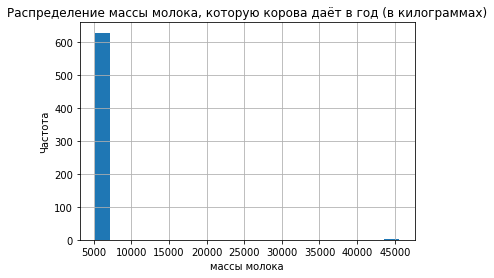

In [23]:
print(df_ferma_main['удой_кг'].describe())
df_ferma_main['удой_кг'].hist(bins=20);
plt.pyplot.title('Распределение массы молока, которую корова даёт в год (в килограммах)');
plt.pyplot.xlabel("массы молока");
plt.pyplot.ylabel("Частота");

Можно заметить, что в данных есть аномально большое значение равное 45 тысяч кг удоя, посмотрим на все объекты, где удой составляет больше 10 тысяч кг молока.

In [24]:
display(df_ferma_main.query('удой_кг > 10000'))
df_ferma_main.describe()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


,id,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Можно заметить, что существует один объект с удоем больше 10 тысяч, и он равен 45616 кг удоя. Этот один объекти является аномалией в данных. Так как это всего один объект - удалим его из данных

In [25]:
df_ferma_main = df_ferma_main.query('удой_кг < 10000')

Посмотрим на распределение значений данного признака после удаления выброса

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64


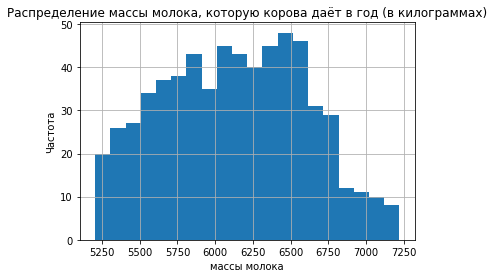

In [26]:
print(df_ferma_main['удой_кг'].describe())
df_ferma_main['удой_кг'].hist(bins=20);
plt.pyplot.title('Распределение массы молока, которую корова даёт в год (в килограммах)');
plt.pyplot.xlabel("массы молока");
plt.pyplot.ylabel("Частота");

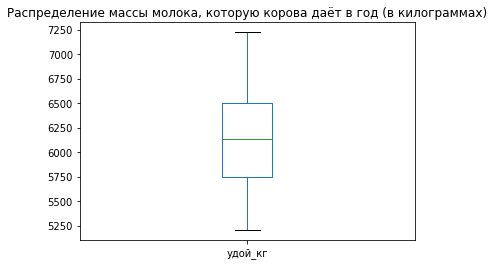

In [27]:
df_ferma_main['удой_кг'].plot.box();
plt.pyplot.title('Распределение массы молока, которую корова даёт в год (в килограммах)');

Можно заметить, что данные удоя распределены нормально со средним значением равным 6125 кг и медианным равным 6132 реднеквадратичным отклонением равным 475. Исзодя из этого можно сделать вывод что выбросов в данных нет. Большиство данных распределено в промежутке от 5749 до 6501. Минимальное значение - 5204, а макисмальное - 7222. Размах данных составляет = 2018 кг.

#### Распределение признака эке

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64


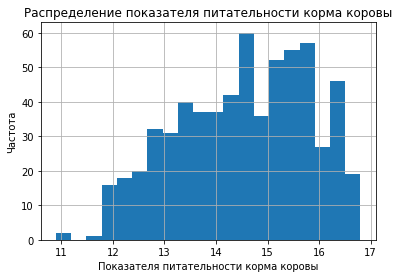

In [28]:
print(df_ferma_main['эке'].describe())
df_ferma_main['эке'].hist(bins=20);
plt.pyplot.title('Распределение показателя питательности корма коровы');
plt.pyplot.xlabel("Показателя питательности корма коровы");
plt.pyplot.ylabel("Частота");

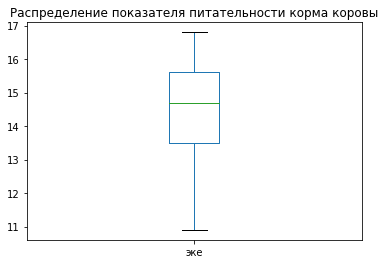

In [29]:
df_ferma_main['эке'].plot.box();
plt.pyplot.title('Распределение показателя питательности корма коровы');

Можно заметить, что данные эке распределены нормально со средним значением равным 14.54  и медианным равным 14.70 среднеквадратичным отклонением равным 1.3. Исзодя из этого можно сделать вывод что выбросов в данных нет. Большиство данных распределено в промежутке от 13.5 до 16.8. Минимальное значение - 4561, а макисмальное - 7222. Размах данных составляет = 2661 кг.

#### Распределение признака сырой_протеин_г

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин_г, dtype: float64


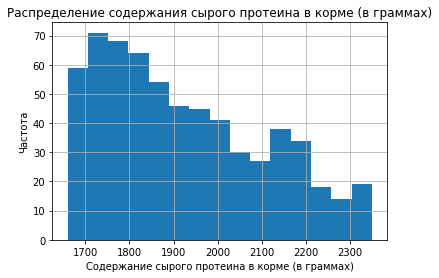

In [30]:
print(df_ferma_main['сырой_протеин_г'].describe());
df_ferma_main['сырой_протеин_г'].hist(bins=15);
plt.pyplot.title('Распределение содержания сырого протеина в корме (в граммах)');
plt.pyplot.xlabel("Содержание сырого протеина в корме (в граммах)");
plt.pyplot.ylabel("Частота");

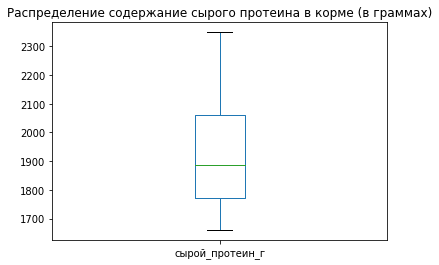

In [31]:
df_ferma_main['сырой_протеин_г'].plot.box();
plt.pyplot.title('Распределение содержание сырого протеина в корме (в граммах)');

Распределение данного признака можно отнести к нормальному распределениею с откланением вправо, со средним значением равным 1923 и медианным равным 1888 среднеквадратичным отклонением равным 182. Исзодя из этого можно сделать вывод что выбросов в данных нет. Большинство данных распределено в промежутке от 1771 до 2062. 

#### Распределение признака спо (отношение сахара к протеину в корме коровы)

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64


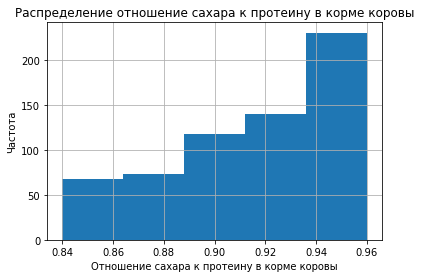

In [32]:
print(df_ferma_main['спо'].describe());
df_ferma_main['спо'].hist(bins=5);
plt.pyplot.title('Распределение отношение сахара к протеину в корме коровы');
plt.pyplot.xlabel("Отношение сахара к протеину в корме коровы");
plt.pyplot.ylabel("Частота");

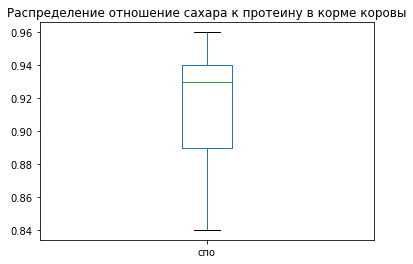

In [33]:
df_ferma_main['спо'].plot.box();
plt.pyplot.title('Распределение отношение сахара к протеину в корме коровы');

Распределение данного признака можно отнести к нормальному распределениею с откланением влево, со средним значением равным 0.91 и медианным равным 0.93 среднеквадратичным отклонением равным 0.03. Исходя из этого можно сделать вывод что выбросов в данных нет. Большиство данных распределено в промежутке от 0.89 до 0.94. 

#### Распределение признака жирность_%

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность_%, dtype: float64


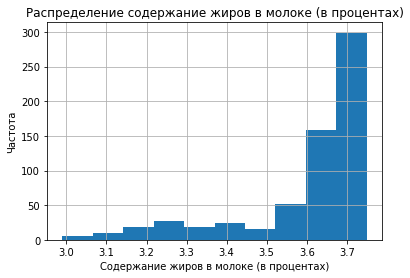

In [34]:
print(df_ferma_main['жирность_%'].describe());
df_ferma_main['жирность_%'].hist(bins=10);
plt.pyplot.title('Распределение содержание жиров в молоке (в процентах)');
plt.pyplot.xlabel("Содержание жиров в молоке (в процентах)");
plt.pyplot.ylabel("Частота");

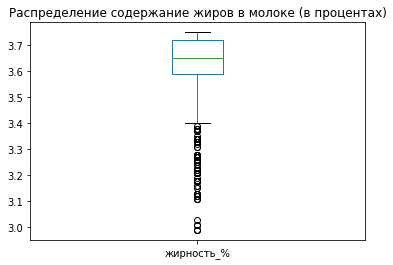

In [35]:
df_ferma_main['жирность_%'].plot.box();
plt.pyplot.title('Распределение содержание жиров в молоке (в процентах)');

Распределение данного признака можно отнести к нормальному распределениею с откланением влево, со средним значением равным 3.6 и медианным равным 3.65 среднеквадратичным отклонением равным 0.16. Большинство данных распределено в промежутке от 3.69 до 3.72.
На графике "усы" можно заметить выбросы снизу, однако в данном случае можно не удалять данные выбросы, так как жирность может зависеть от породы , типа корма и других особенностей коровы.

Можно заметить, что  распредление данного признака похоже на экспоненциальное, со средним значеним со средним значением равным 3.6 и медианным равным 3.65 среднеквадратичным отклонением равным 0.16. Большинство данных распределено в промежутке от 3.69 до 3.72.
На графике "усы" можно заметить выбросы снизу, однако в данном случае можно не удалять данные выбросы, так как жирность может зависеть от породы , типа корма и других особенностей коровы.

#### Распределение признака белок_%

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок_%, dtype: float64


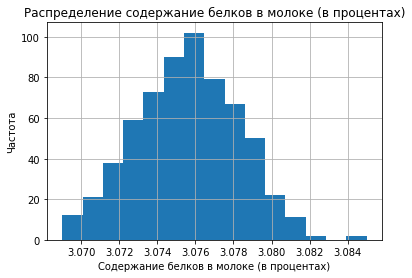

In [36]:
print(df_ferma_main['белок_%'].describe());
df_ferma_main['белок_%'].hist(bins=15);
plt.pyplot.title('Распределение содержание белков в молоке (в процентах)');
plt.pyplot.xlabel("Содержание белков в молоке (в процентах)");
plt.pyplot.ylabel("Частота");

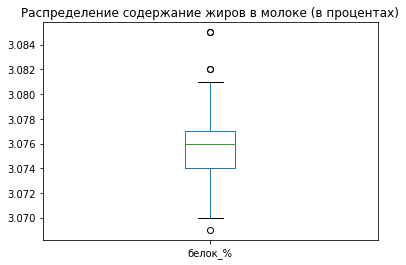

In [37]:
df_ferma_main['белок_%'].plot.box();
plt.pyplot.title('Распределение содержание жиров в молоке (в процентах)');

Распределение данного признака можно отнести к нормальному распределениею, со средним значением равным 3.07 и медианным равным 3.07 среднеквадратичным отклонением равным 0.002. Исходя из этого можно сделать вывод что выбросов в данных нет ( несколько аномалий есть на графике с усами, однако нет предпосылок для их удаления из датасета) . Большиство данных распределено в промежутке от 3.074 до 3.077. 

#### Распределение признака порода

вис бик айдиал     372
рефлешнсоверинг    256
Name: порода, dtype: int64


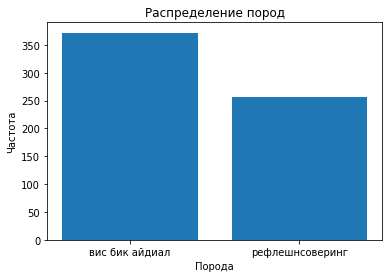

In [38]:
breed_counts = df_ferma_main['порода'].value_counts()
plt.pyplot.bar(breed_counts.index, breed_counts.values);
plt.pyplot.title('Распределение пород');
plt.pyplot.xlabel("Порода");
plt.pyplot.ylabel("Частота");
print(breed_counts)

Можно заметить, что большенство данных с породой 'вис бик айидал', объектов с таким признаком равно = 373, с другой породой = 256. Всего две породы присутствуют 

#### Распределение признака тип_пастбища

холмистое    350
равнинное    278
Name: тип_пастбища, dtype: int64


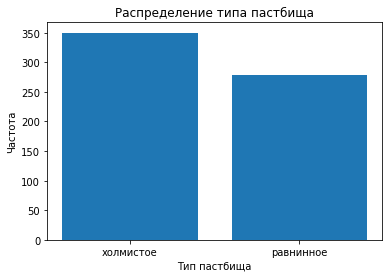

In [39]:
pasture_counts = df_ferma_main['тип_пастбища'].value_counts()
plt.pyplot.bar(pasture_counts.index, pasture_counts.values);
plt.pyplot.title('Распределение типа пастбища');
plt.pyplot.xlabel("Тип пастбища");
plt.pyplot.ylabel("Частота");
print(pasture_counts)

Всего присутствует 2 вида пастбища, преобладающим пастбищем является - холмистое ( 351) , второе - равнинное ( 278) 

#### Распределение признака порода_папы_быка

айдиал     317
соверин    311
Name: порода_папы_быка, dtype: int64


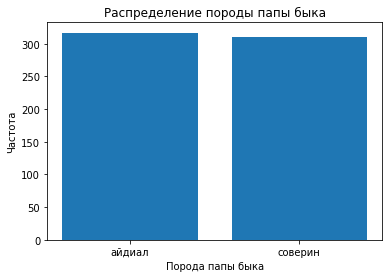

In [40]:
dad_counts = df_ferma_main['порода_папы_быка'].value_counts()
plt.pyplot.bar(dad_counts.index, dad_counts.values);
plt.pyplot.title('Распределение породы папы быка');
plt.pyplot.xlabel("Порода папы быка");
plt.pyplot.ylabel("Частота");
print(dad_counts)

Всего присутствует 2 вида породы папы быка, преобладающей породой является  - айдиал (318) , второе - соверин (311) 

#### Распределение признака вкус_молока

вкусно       370
не вкусно    258
Name: вкус_молока, dtype: int64


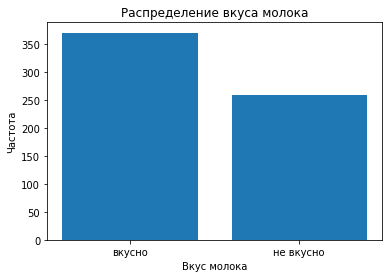

In [41]:
taste_counts = df_ferma_main['вкус_молока'].value_counts()
plt.pyplot.bar(taste_counts.index, taste_counts.values);
plt.pyplot.title('Распределение вкуса молока');
plt.pyplot.xlabel("Вкус молока");
plt.pyplot.ylabel("Частота");
print(taste_counts)

Большинство объектов обладает вкусным молоком ( 371) , так же есть невкусное молоко

#### Распределение признака возраст

более_2_лет    518
менее_2_лет    110
Name: возраст, dtype: int64


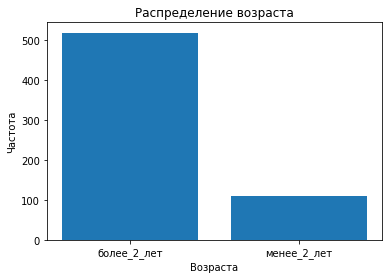

In [42]:
age_counts = df_ferma_main['возраст'].value_counts()
plt.pyplot.bar(age_counts.index, age_counts.values);
plt.pyplot.title('Распределение возраста');
plt.pyplot.xlabel("Возраста");
plt.pyplot.ylabel("Частота");
print(age_counts)

Большинство объектов являтся коровами старше 2х лет  (519) , так же есть молодые коровы до двух лет ( 110)

#### Распределение признака имя_папы

Добавим в датафрейм df_ferma_main признак имя_папы из таблицы df_ferma_dad по ключу 'id' и посмотрим на распределение имени папы у коров

In [43]:
df_ferma_main = df_ferma_main.merge(df_ferma_dad, on='id', how='left')
print(df_ferma_main['имя_папы'].unique())

['буйный' 'соловчик' 'барин' 'геркулес']


барин       240
буйный      214
соловчик    110
геркулес     64
Name: имя_папы, dtype: int64


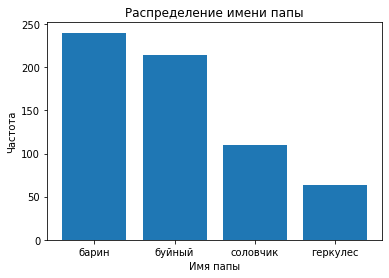

In [44]:
dad_name_counts = df_ferma_main['имя_папы'].value_counts()
plt.pyplot.bar(dad_name_counts.index, dad_name_counts.values);
plt.pyplot.title('Распределение имени папы');
plt.pyplot.xlabel("Имя папы");
plt.pyplot.ylabel("Частота");
print(dad_name_counts)

Таким образом, можно заметить, что большенство объектов имеет имя папы 'барин' ( 240) и 'буйный' (215) , а так же есть оюъекты с признаком имя папы 'соловчик' (110)  'геркулес' (64)

### посмотрим на распределение данных в таблице df_cow_buy

In [45]:
display(df_cow_buy.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


#### Распределение признака порода

рефлешнсоверинг    11
вис бик айдиал      9
Name: порода, dtype: int64


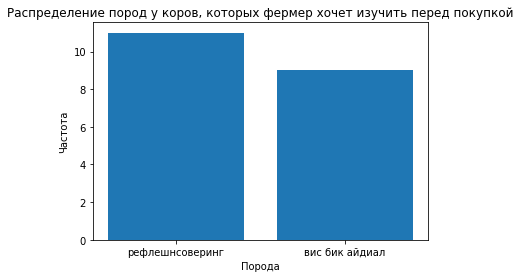

In [46]:
breed_buy_counts = df_cow_buy['порода'].value_counts()
plt.pyplot.bar(breed_buy_counts.index, breed_buy_counts.values);
plt.pyplot.title('Распределение пород у коров, которых фермер хочет изучить перед покупкой');
plt.pyplot.xlabel("Порода");
plt.pyplot.ylabel("Частота");
print(breed_buy_counts)

Можно заметить, что коров для расмотрения к покупке  с породой 'рефлешнсоверинг' больше(11), чем 'вис бик айидал' (8)

#### Распределение признака тип_пастбища

равнинное    11
холмистое     9
Name: тип_пастбища, dtype: int64


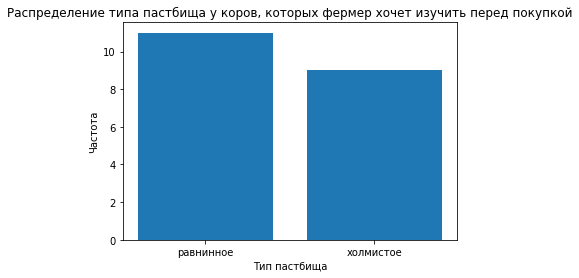

In [47]:
pasture_buy_counts = df_cow_buy['тип_пастбища'].value_counts()
plt.pyplot.bar(pasture_buy_counts.index, pasture_buy_counts.values);
plt.pyplot.title('Распределение типа пастбища у коров, которых фермер хочет изучить перед покупкой');
plt.pyplot.xlabel("Тип пастбища");
plt.pyplot.ylabel("Частота");
print(pasture_buy_counts)

Можно заметить, что коров для расмотрения к покупке  с типом пастбища 'равнинное' больше (11), чем 'холмистое' (8) одинаковое количество

#### Распределение признака порода_папы_быка

соверин    12
айдиал      8
Name: порода_папы_быка, dtype: int64


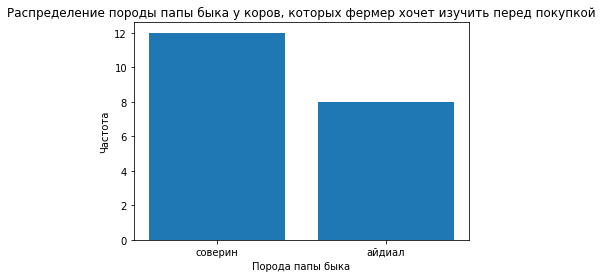

In [48]:
pasture_dad_buy_counts = df_cow_buy['порода_папы_быка'].value_counts()
plt.pyplot.bar(pasture_dad_buy_counts.index, pasture_dad_buy_counts.values);
plt.pyplot.title('Распределение породы папы быка у коров, которых фермер хочет изучить перед покупкой');
plt.pyplot.xlabel("Порода папы быка");
plt.pyplot.ylabel("Частота");
print(pasture_dad_buy_counts)

Можно заметить, что коровк для расмотрения к покупке  с породой папы быка "соверин" больще ( 12) , чем с породой папы быка "айдиал"

#### Распределение признака имя_папы

буйный      8
геркулес    6
барин       4
соловчик    2
Name: имя_папы, dtype: int64


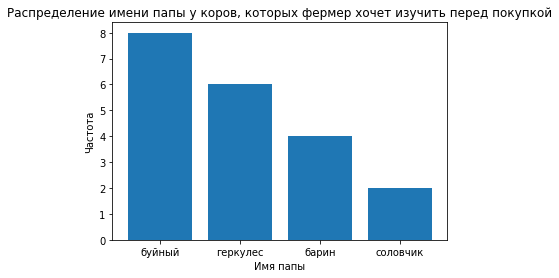

In [49]:
dad_name_buy_counts = df_cow_buy['имя_папы'].value_counts()
plt.pyplot.bar(dad_name_buy_counts.index, dad_name_buy_counts.values);
plt.pyplot.title('Распределение имени папы у коров, которых фермер хочет изучить перед покупкой');
plt.pyplot.xlabel("Имя папы");
plt.pyplot.ylabel("Частота");
print(dad_name_buy_counts)

Чаще всего в данных встречается папа под именем "буйный" (8) и "геркулес" (6) . Также существует еще 2 папы для коров к расмотрению "барин" (4) и "соловчик" (2)

#### Распределение признака текущая_жирность_%

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: текущая_жирность_%, dtype: float64


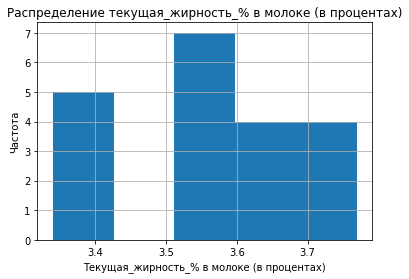

In [50]:
print(df_cow_buy['текущая_жирность_%'].describe());
df_cow_buy['текущая_жирность_%'].hist(bins=5);
plt.pyplot.title('Распределение текущая_жирность_% в молоке (в процентах)');
plt.pyplot.xlabel("Текущая_жирность_% в молоке (в процентах)");
plt.pyplot.ylabel("Частота");

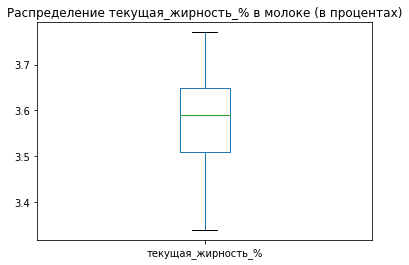

In [51]:
df_cow_buy['текущая_жирность_%'].plot.box();
plt.pyplot.title('Распределение текущая_жирность_% в молоке (в процентах)');

Распределение данного признака можно отнести к нормальному распределениею, со средним значением равным 3.57 и медианным равным 3.59 среднеквадратичным отклонением равным 0.12. Несмотря на то, что данных не очень много в датафрейме, то можно сделать вывод что выбросов в данных нет . Большиство данных распределено в промежутке от 3.51 до 3.65. 

Так как данных не очень много в датафрейме, то можно заметить, что большиство данных распределено в промежутке от 3.51 до 3.65. - что лежит в тех же диапазонах, что и в основной таблице соответсвующего признака 

#### Распределение текущий_уровень_белок_%

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок_%, dtype: float64


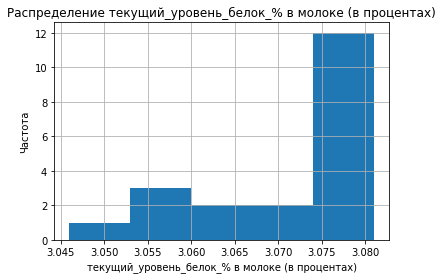

In [52]:
print(df_cow_buy['текущий_уровень_белок_%'].describe());
df_cow_buy['текущий_уровень_белок_%'].hist(bins=5);
plt.pyplot.title('Распределение текущий_уровень_белок_% в молоке (в процентах)');
plt.pyplot.xlabel("текущий_уровень_белок_% в молоке (в процентах)");
plt.pyplot.ylabel("Частота");

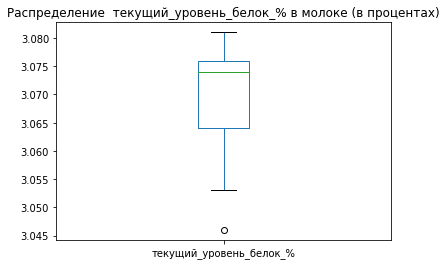

In [53]:
df_cow_buy['текущий_уровень_белок_%'].plot.box();
plt.pyplot.title('Распределение  текущий_уровень_белок_% в молоке (в процентах)');

Так как данных не очень много в датафрейме, то можно заметить, что большиство данных распределено в промежутке от 3.064 до 3.076.  - что лежит в тех же диапазонах, что и в основной таблице соответсвующего признака 

#### Распределение признака возраст

более_2_лет    15
менее_2_лет     5
Name: возраст, dtype: int64


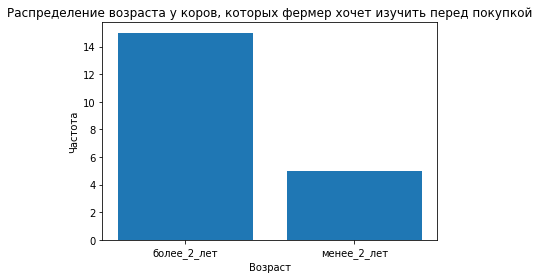

In [54]:
age_buy_counts = df_cow_buy['возраст'].value_counts()
plt.pyplot.bar(age_buy_counts.index, age_buy_counts.values);
plt.pyplot.title('Распределение возраста у коров, которых фермер хочет изучить перед покупкой');
plt.pyplot.xlabel("Возраст");
plt.pyplot.ylabel("Частота");
print(age_buy_counts)

Можно сделать вывод, что большенство коров на продажу являются взрослыми ( более 2 лет) ( 15 шт.) , остальные коровы до 2 лет возрастом 

### Вывод по главе

Мы провели исследовательский анализ данных и выявили следующее:

для данных в датафрейме df_ferma_main:

1. В признаке Удой, кг был обнаружен один аномальный объект, было решено его удалить из данных
2. В некоторых признаках было выявлено небольшое количествно аномалий, которые было решено оставить и не удалять: жирность_%, белок_%

Можно сотсавить портрет типичного объекта в стаде фермера на текущий момент. Это объект с:
1. Показателем массы молока, которую корова даёт в год (в килограммах) в промежутке от 5749 до 6501.
2. Показателем питательности корма коровы в промежутке от 13.5 до 16.8
3. Показателем содержания сырого протеина в корме (в граммах) от 1771 до 2062
4. Показателем отношение сахара к протеину в корме коровы 0.89 до 0.94
5. Показателем содержание жиров в молоке (в процентах) от 3.69 до 3.72
6. Показателем содержание белков в молоке (в процентах) от 3.074 до 3.077
7. Показателем породы равным вис бик айдиал  или рефлешнсоверинг 
8. Показателем тип пастбища равным холмистое или равнинное  
9. Показателем попрода папы равным айдиал или соверин
10. Показателем вкус молока в большинстве случаев - вкусно
11. Показатель возраст в большенстве случаев равным - более 2 лет 
12. Показатель имя_папы в большенстве случаев равным - барин или буйный 

для данных в датафрейме df_cow_buy:

Аномалий не обнаружено . Объекты в категориальные призаках совпадают с объектами из категориальных признаков основной таблици, количественные признаки находятся в диапазонах подобных диапазноам основной таблици


## Корреляционный анализ

### Изучим взаимосвязь между признаками

Найдем корреляцию между всеми признаками при помощи коэффициент корреляции Фи так как он позволит найти корреляцию между количественными и количественными данными , количественными и категориальными, категориальными и категориальными.

In [55]:
quantitative_columns = df_ferma_main.select_dtypes(include=[float, int]).columns
categorical_columns = df_ferma_main.select_dtypes(exclude=[float, int]).columns

corr_matrix = df_ferma_main.phik_matrix(interval_cols = quantitative_columns)

display(corr_matrix)

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,имя_папы
id,1.000000,0.000000,0.000000,0.115822,0.382303,0.611843,0.037776,0.320977,0.519949,0.000000,0.039659,0.000000,0.000000
удой_кг,0.000000,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101,0.433409
эке,0.000000,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596,0.069197
сырой_протеин_г,0.115822,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685,0.111229
спо,0.382303,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410,0.409142
порода,0.611843,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295,0.382644
тип_пастбища,0.037776,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455,0.233149
порода_папы_быка,0.320977,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817,0.982909
жирность_%,0.519949,0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913,0.090409
белок_%,0.000000,0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000,0.091102


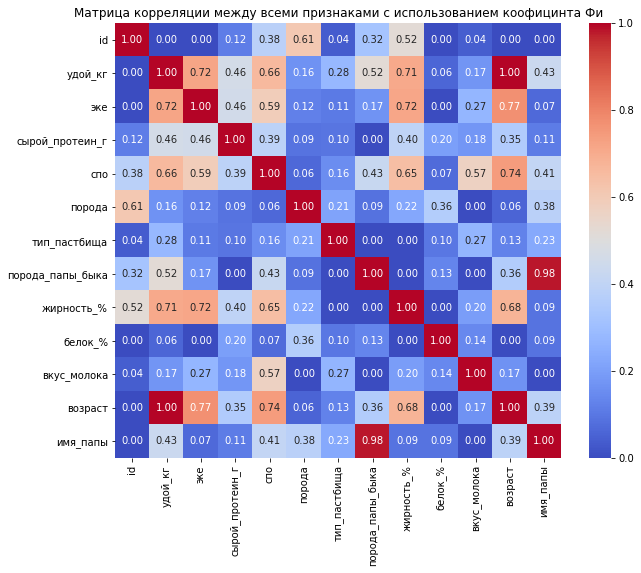

In [56]:
plt.pyplot.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.pyplot.title('Матрица корреляции между всеми признаками с использованием коофицинта Фи')
plt.pyplot.show()

#### Корреляция признака удой_кг

Можно заметить, что существует очень сильная корреляция удоя от возраста объекта, посомтрим детальнее на среднее значение удоя при каждом уровне удоя.

In [57]:
grouped_age = df_ferma_main.groupby('возраст')['удой_кг'].mean()
print(grouped_age)

возраст
более_2_лет    6270.735521
менее_2_лет    5444.245455
Name: удой_кг, dtype: float64


Таким образом, можно сделать вывод, что чем старше корова, тем больше удоя выходи в год

Так же можно заметить, что существует сильная положительная связь между удоем и такими количественными признаками, как эке, спо,  жирность_%
средня связь : сырой протеин_г, порода папы быка, имя папы

In [58]:
grouped_dad = df_ferma_main.groupby('порода_папы_быка')['удой_кг'].mean()
print(grouped_dad)

порода_папы_быка
айдиал     6310.899054
соверин    5937.469453
Name: удой_кг, dtype: float64


In [59]:
grouped_dad_name = df_ferma_main.groupby('имя_папы')['удой_кг'].mean()
print(grouped_dad_name)

имя_папы
барин       5897.445833
буйный      6364.481308
геркулес    6360.953125
соловчик    6023.827273
Name: удой_кг, dtype: float64


Средняя связь породы папы быка характирезуется тем, что для породы папы_быка айдиал характерная больший удой, чем для породы папы соверин, имени папы бака характерезется тем, что для таких отцов как буйный, геркулес характерны коровы с большим удоем, чем для пап соловчик и барин

Слабая связь существует между удоем и такими признаками как тип пастбища и вкус молока. Холмистому типу пастбища харкетрен больший удой молока, так же вкусному молоку характерен больший удой

In [60]:
grouped_pasture = df_ferma_main.groupby('тип_пастбища')['удой_кг'].mean()
print(grouped_pasture)
grouped_taste = df_ferma_main.groupby('вкус_молока')['удой_кг'].mean()
print(grouped_taste)

тип_пастбища
равнинное    6056.287770
холмистое    6181.314286
Name: удой_кг, dtype: float64
вкус_молока
вкусно       6170.770270
не вкусно    6061.717054
Name: удой_кг, dtype: float64


##### Вывод по корреляции удоя и других факторов

Таким образом, мы установили, что существует следующие виды связи для признака удой: 

1. очень сильная корреляция удоя от возраста объекта (чем старше объект, тем больше удоя)
2. сильная положительная связь между удоем и такими количественными признаками, как показатель питательности корма коровы, отношение сахара к протеину в корме коровы,  содержание жиров в молоке (в процентах);
3. средня связь между удоем и таким количественным признаком как  содержание сырого протеина в корме, и такими категориальными признаками как порода папы быка (  для породы папы_быка айдиал характерная больший удой, чем для породы папы соверин) , имя папы быка (таким отцов как буйный, геркулес характерны коровы с большим удоем, чем для пап соловчик и барин)
4. слабая связь существует между удоем и такими категориальными признаками как тип пастбища (Холмистому типу пастбища харкетрен больший удой молока) и вкус молока (вкусному молоку характерен больший удой), порода коровы 
5. Не обнаружено связи между удоем и  содержание белков в молоке

### Корреляция признака вкус молока

Можно увидеть сильную связь между вкусом молока и показателем спо ( Чем выще показатель отношения сахара к протеину в корме коровы, тем вкуснее молко) 

In [61]:
grouped_taste_2 = df_ferma_main.groupby('вкус_молока')['спо'].mean()
print(grouped_taste_2)

вкус_молока
вкусно       0.918176
не вкусно    0.905795
Name: спо, dtype: float64


Можно заметить слабую связь между вкусом молока и такими признаками как:
эке - чем выше показатель питательности корма коровы, тем вкуснее молоко
тип пастбища - типу пастбища холмистое характерно вкусное молоко, чем равнистое
жирность - чем выше показатель содержание жиров в молоке , тем вкуснее молоко
сырой протеин - чем выше показатель содержание сырого протеина в корме , тем вкуснее молоко
возраст - чем старше корова, тем вкуснее молоко 

In [62]:
grouped_taste_3 = df_ferma_main.groupby('вкус_молока')['эке'].mean()
print(grouped_taste_3)

вкус_молока
вкусно       14.781622
не вкусно    14.214729
Name: эке, dtype: float64


In [63]:
grouped_taste_4 = df_ferma_main.query('вкус_молока == "вкусно"').groupby('тип_пастбища')['тип_пастбища'].count().rename('Количество_вкусно')
grouped_taste_4_total = df_ferma_main.groupby('тип_пастбища')['тип_пастбища'].count().rename('Общее_количество')
grouped_taste_4_result = pd.merge(grouped_taste_4, grouped_taste_4_total, on='тип_пастбища', how='outer')
grouped_taste_4_result['Отношение'] = grouped_taste_4_result['Количество_вкусно'] / grouped_taste_4_result['Общее_количество']
print(grouped_taste_4_result)

              Количество_вкусно  Общее_количество  Отношение
тип_пастбища                                                
равнинное                   136               278   0.489209
холмистое                   234               350   0.668571


In [64]:
grouped_taste_5 = df_ferma_main.groupby('вкус_молока')['сырой_протеин_г'].mean()
print(grouped_taste_5)

вкус_молока
вкусно       1946.429730
не вкусно    1891.248062
Name: сырой_протеин_г, dtype: float64


In [65]:
grouped_taste_6 = df_ferma_main.query('вкус_молока == "вкусно"').groupby('возраст')['возраст'].count().rename('Количество_вкусно')
grouped_taste_6_total = df_ferma_main.groupby('возраст')['возраст'].count().rename('Общее_количество')
grouped_taste_6_result = pd.merge(grouped_taste_6, grouped_taste_6_total, on='возраст', how='outer')
grouped_taste_6_result['Отношение'] = grouped_taste_6_result['Количество_вкусно'] / grouped_taste_6_result['Общее_количество']
print(grouped_taste_6_result)

             Количество_вкусно  Общее_количество  Отношение
возраст                                                    
более_2_лет                319               518   0.615830
менее_2_лет                 51               110   0.463636


##### Ввыод по корреляции признака вкус молока

Таким образом, мы установили, что существует следующие виды связи для признака вкус молока: 

1. сильная корреляция вкуса молока от показателем спо (чем выще показатель отношения сахара к протеину в корме коровы, тем вкуснее молко) 
2. слабую связь между вкусом молока и такими признаками как: эке (чем выше показатель питательности корма коровы, тем вкуснее молоко), тип пастбища (типу пастбища холмистое характерно вкусное молоко, чем равнистое), жирность (чем выше показатель содержание жиров в молоке , тем вкуснее молоко), сырой протеин (чем выше показатель содержание сырого протеина в корме , тем вкуснее молоко),  возраст (чем старше корова, тем вкуснее молоко), удой (вкусному молоку характерен больший удой) 
5. Не обнаружено или крайне слабая связи между вкусом молока  и такими признаками как имя папы, белок, порода папы, порода коровы, 

### Вывод по взаимосвязи между признаками

Мы установили следующие связи между целевыми признаками и их связями:

существует следующие виды связи для признака удой: 

1. очень сильная корреляция удоя от возраста объекта (чем старше объект, тем больше удоя)
2. сильная положительная связь между удоем и такими количественными признаками, как показатель питательности корма коровы, отношение сахара к протеину в корме коровы,  содержание жиров в молоке (в процентах);
3. средня связь между удоем и таким количественным признаком как  содержание сырого протеина в корме, и такими категориальными признаками как порода папы быка (  для породы папы_быка айдиал характерная больший удой, чем для породы папы соверин) , имя папы быка (таким отцов как буйный, геркулес характерны коровы с большим удоем, чем для пап соловчик и барин)
4. слабая связь существует между удоем и такими категориальными признаками как тип пастбища (Холмистому типу пастбища харкетрен больший удой молока) и вкус молока (вкусному молоку характерен больший удой) 
5. Не обнаружено связи между удоем и такими признаками как порода коровы и содержание белков в молоке


существует следующие виды связи для признака вкус молока: 

1. сильная корреляция вкуса молока от показателем спо (чем выще показатель отношения сахара к протеину в корме коровы, тем вкуснее молко) 
2. слабую связь между вкусом молока и такими признаками как: эке (чем выше показатель питательности корма коровы, тем вкуснее молоко), тип пастбища (типу пастбища холмистое характерно вкусное молоко, чем равнистое), жирность (чем выше показатель содержание жиров в молоке , тем вкуснее молоко), сырой протеин (чем выше показатель содержание сырого протеина в корме , тем вкуснее молоко),  возраст (чем старше корова, тем вкуснее молоко), удой (вкусному молоку характерен больший удой) 
5. Не обнаружено или крайне слабая связи между вкусом молока  и такими признаками как имя папы, белок, порода папы, порода коровы, 

Таким образом сделаем вывод, что между целевыми признаками и входными существует положительная связь, а так же существует мультиклассовая связь для категориальных данных для ряда признаков, хотя и есть признаки, которые никак не связаны с целевыми , такие как содержание белка и порода коровы.
Так же можно заметить, что существуют такие сильные связи между входными признаками как: 
1. эке и возраст ( коофициент корреляции 0.77) 
2. эке и жирность ( 0.72) 
3. спо и возраст ( 0.74)
4. порода папы быка и имя папы ( 0.98)

Данные связи не указвыают на мультикалениарность кроме последнего ( порода папы быка и имя папы ( 0.98)) - данный фактор как имя папы быка не следует использовать для обучения модели МО. 



### Построим диаграммы рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков

Создадим функцию для диаграммы рассеяния для признака Удой и входного количественнго признака с утетом значения категориальных данных

In [66]:
def scatterplot_category(feature, category, ax):
    categories = df_ferma_main[category].unique()
    colors = plt.pyplot.cm.get_cmap('Set1', len(categories))
    plt.pyplot.figure(figsize=(8, 6))
    
    for index, category_obj in enumerate(categories):
        category_df = df_ferma_main[df_ferma_main[category] == category_obj]
        ax.scatter(category_df['удой_кг'], category_df[feature],
                          label = category_obj,
                          color = colors(index),
                          s = 100,
                          alpha = 0.5) 
    ax.legend(title=category)
    ax.set_xlabel('Удой, кг')
    ax.set_ylabel(feature)
    ax.set_title(f'Удой, кг и {feature.capitalize()} по {category.capitalize()}')

#### Эке (показатель питательности корма коровы)

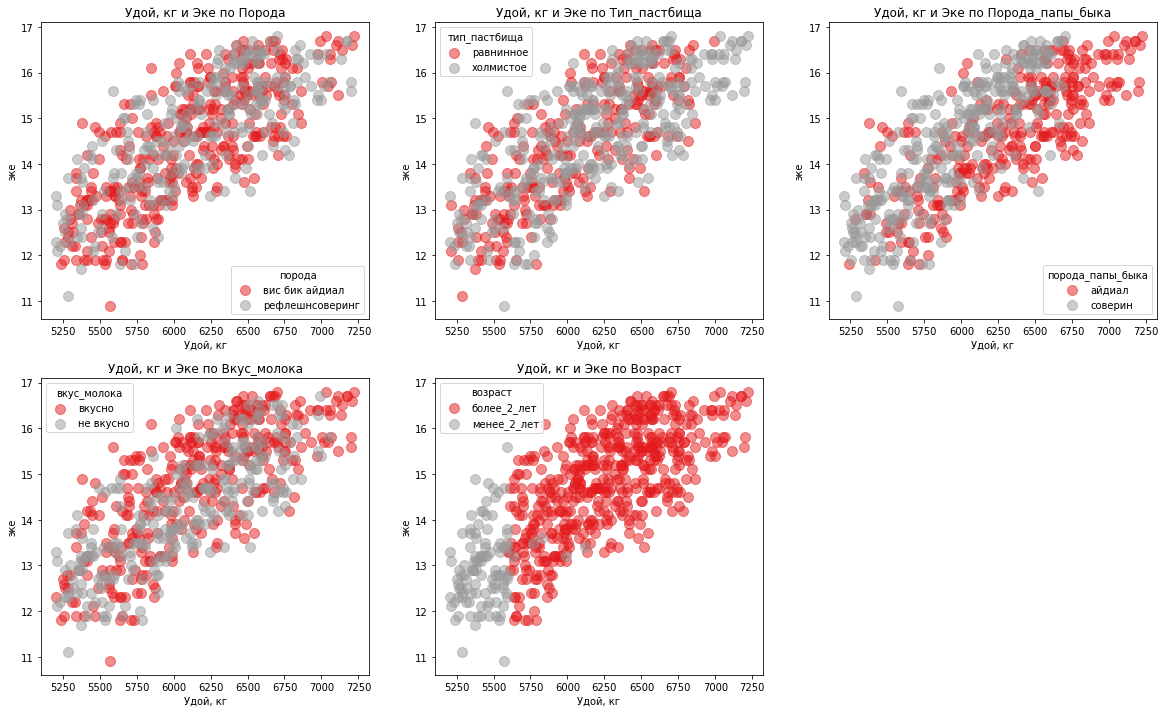

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [67]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,12))
categories = ['порода','тип_пастбища','порода_папы_быка','вкус_молока', 'возраст']
axes = axes.flatten()

for ax, category in zip(axes[:5], categories):
    scatterplot_category('эке', category , ax)

axes[5].axis('off')  
plt.pyplot.tight_layout() 
plt.pyplot.show();

Заметим, что между Удоем и таким признаком как ЭКЕ (показатель питательности корма коровы) существует линейная зависимость, что и подтверждается коофициентом корреляции равным 0.72. 
Разброс по категориальным признакам, таким как Порода, Тип Пастбища, Вкус молока от значений Удоя и ЭКЕ наблюдается равномерный, что означает, что нет зависимости данных категориальных признаков от уровня Удоя и уровня ЭКЕ.
Напротив такие категориальные призаки как порода папы быка и возраст имеют зависимость от уровня Удоя и ЭКЕ. 
Так объектам с возрастом более 2 лет характерен высокий уровень удоя при любом ( высоком или низком) уровне ЭКЕ, а объектом с возрастом менее 2 лет характерене маленький уровень удоя при любом ( высоком или низком) уровне ЭКЕ.
Так же  объектам с породой папы быка айдиал характерен уровень ЭКЕ ниже чем для объектов с продой папы быка соверин при одинаковом уровне удоя, или же объектам с породой папы быка айдиал характерен уровень Удоя больше, чем для объектов с продой папы быка соверин при одинаковом уровне ЭКЕ.

#### Cырой_протеин_г (содержание сырого протеина в корме (в граммах))

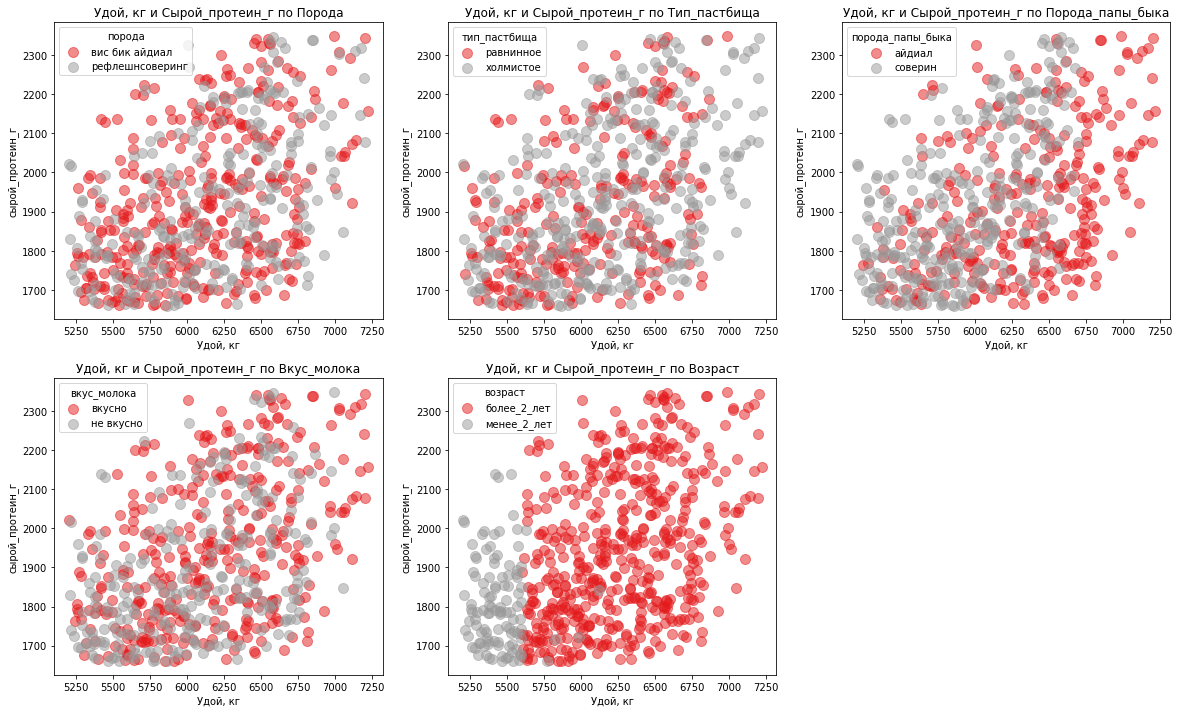

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [68]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,12))
categories = ['порода','тип_пастбища','порода_папы_быка','вкус_молока', 'возраст']
axes = axes.flatten()

for ax, category in zip(axes[:5], categories):
    scatterplot_category('сырой_протеин_г', category , ax)

axes[5].axis('off')  
plt.pyplot.tight_layout() 
plt.pyplot.show();

Заметим, что между Удоем и таким признаком как Cырой_протеин_г (содержание сырого протеина в корме (в граммах)) существует средняя зависимость, что и подтверждается коофициентом корреляции равным 0.46. 
Разброс по категориальным признакам, таким как Порода, Тип Пастбища, Вкус молока от значений Удоя и Cырой_протеин_г наблюдается равномерный, что означает, что нет зависимости данных категориальных признаков от уровня Удоя и уровня Cырой_протеин_г.
Напротив такие категориальные призаки как порода папы быка и возраст имеют зависимость от уровня Удоя и Cырой_протеин_г. 
Так объектам с возрастом более 2 лет характерен высокий уровень удоя при любом ( высоком или низком) уровне ЭКЕ, а объектом с возрастом менее 2 лет характерене маленький уровень удоя при любом ( высоком или низком) уровне Cырой_протеин_г.
Так же  объектам с породой папы быка айдиал характерен уровень Cырой_протеин_г ниже чем для объектов с продой папы быка соверин при одинаковом уровне удоя, или же объектам с породой папы быка айдиал характерен уровень Удоя больше, чем для объектов с продой папы быка соверин при одинаковом уровне Cырой_протеин_г.

#### СПО (Отношение сахара к протеину в корме коровы)

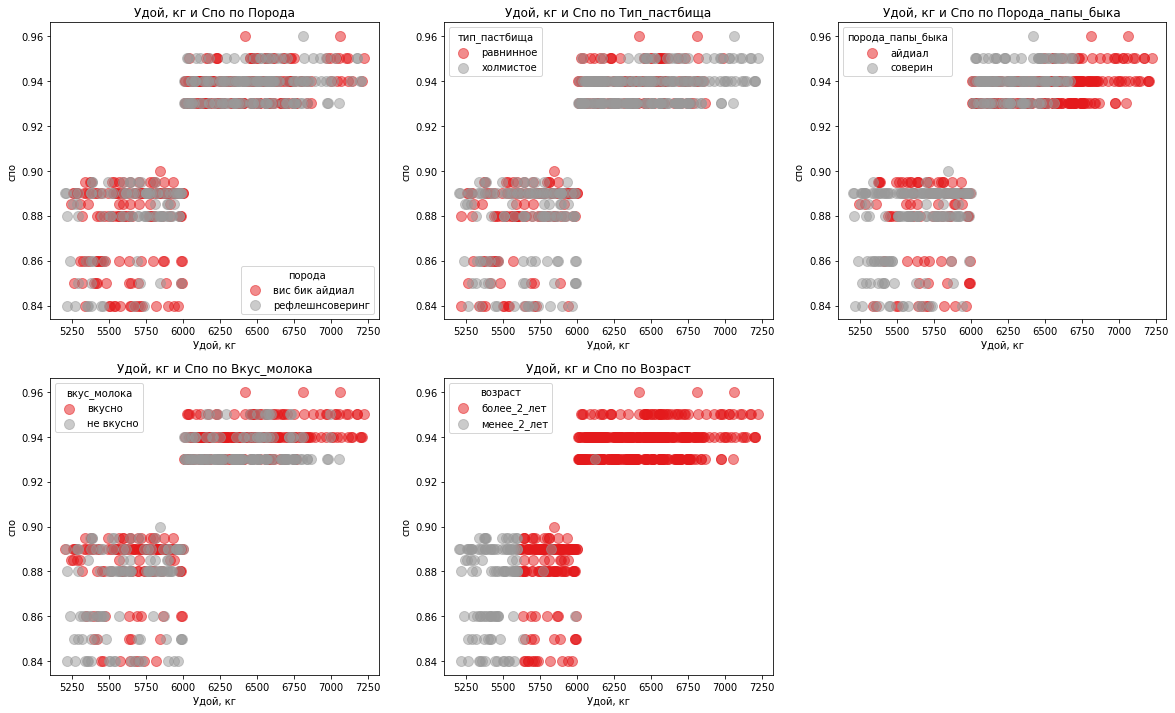

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [69]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,12))
categories = ['порода','тип_пастбища','порода_папы_быка','вкус_молока', 'возраст']
axes = axes.flatten()

for ax, category in zip(axes[:5], categories):
    scatterplot_category('спо', category , ax)

axes[5].axis('off')  
plt.pyplot.tight_layout() 
plt.pyplot.show();

Несмотря на то, что коофициент корреляции между Удоем и СПО равен 0.66 ( сильная положительная связь) связь между данными признакми не являеется линейной. На данное диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Так значение СПО равное 0.92 является границей для кластеров. 
При значении СПО равным 0.92 уровень Удоя высокий и больше 6000 , а при значении СПО меньше 0.92 значение Удоя меньше 6000. В виду того, что наблюдается кластерная зависимость удоя от уровня СПО целесооббразным будет переведение данного фактора в категориальный для создания модели МО ( СПО больше 0.92, СПО меньше 0.92).
Касательно зависимости категориальных признаков от данных фактор : 
1) Не наблюдается зависимости категориальных данных от рассматриваемых количественных признаков, кроме призанка возраст
2) Можно выделить то, что объекты с возрастом больше 2 года дают высокий удой при любом уровне СПО, а боъекты с возрастом меньше 2 года дают маленький удой при низком СПО.

Создадим дополнительный признак 'спо_категориальный'

In [70]:
def categorize(value):
    if value > 0.92:
        return 'высокий'
    else:
        return 'низкий'
    
df_ferma_main['спо_категориальный'] = df_ferma_main['спо'].apply(categorize)

####  Жирность_% (содержание жиров в молоке (в процентах))

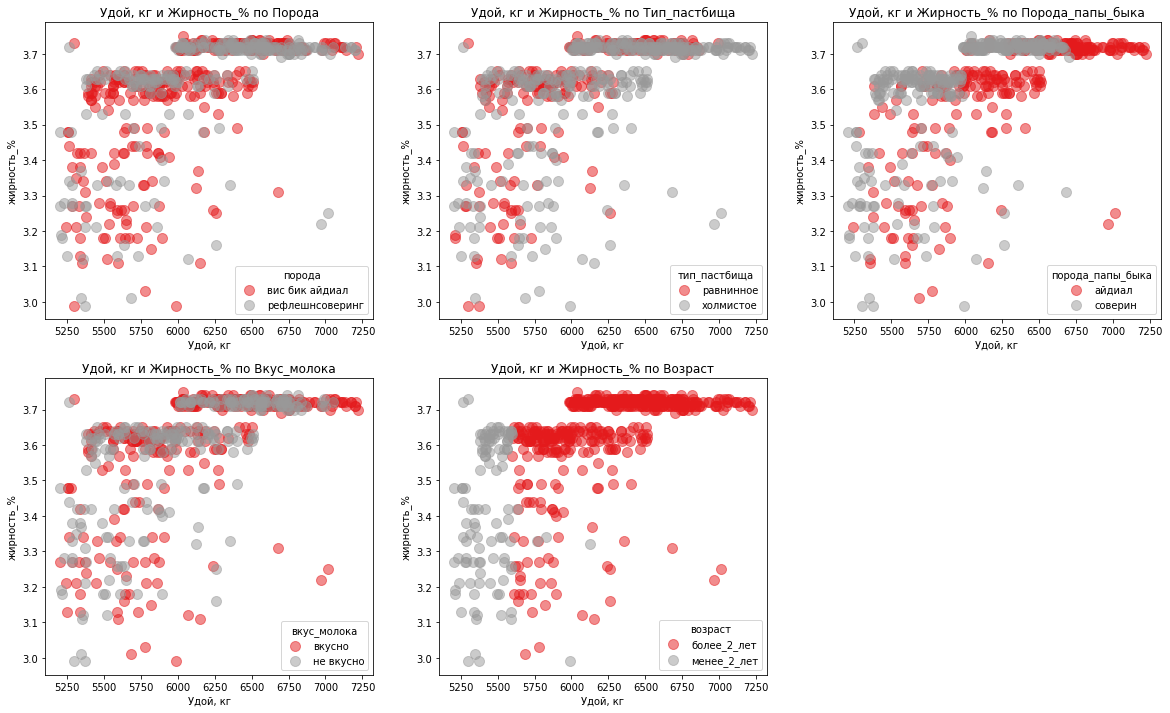

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [71]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,12))
categories = ['порода','тип_пастбища','порода_папы_быка','вкус_молока', 'возраст']
axes = axes.flatten()

for ax, category in zip(axes[:5], categories):
    scatterplot_category('жирность_%', category , ax)

axes[5].axis('off')  
plt.pyplot.tight_layout() 
plt.pyplot.show();

Несмотря на то, что коофициент корреляции между Удоем и жирностью указывает на сильную связь ( коофициент корреляции равен 0.71) - сильная линейная связь  не наблюдается. 
Разброс по категориальным признакам, таким как Порода, Тип Пастбища, Вкус молока от значений Удоя и жирности наблюдается равномерный, что означает, что нет зависимости данных категориальных признаков от уровня Удоя и уровня жирности.
Напротив такие категориальные призаки как порода папы быка и возраст имеют зависимость от уровня Удоя и жирности. 
Так объектам с возрастом более 2 лет характерен высокий уровень удоя при любом ( высоком или низком) уровне жирности, а объектом с возрастом менее 2 лет характерене маленький уровень удоя при любом ( высоком или низком) уровне жирности.
Так же  объектам с породой папы быка айдиал характерен уровень жирности ниже чем для объектов с продой папы быка соверин при одинаковом уровне удоя, или же объектам с породой папы быка айдиал характерен уровень Удоя больше, чем для объектов с продой папы быка соверин при одинаковом уровне жирности.

#### Белок_% (содержание белков в молоке (в процентах))

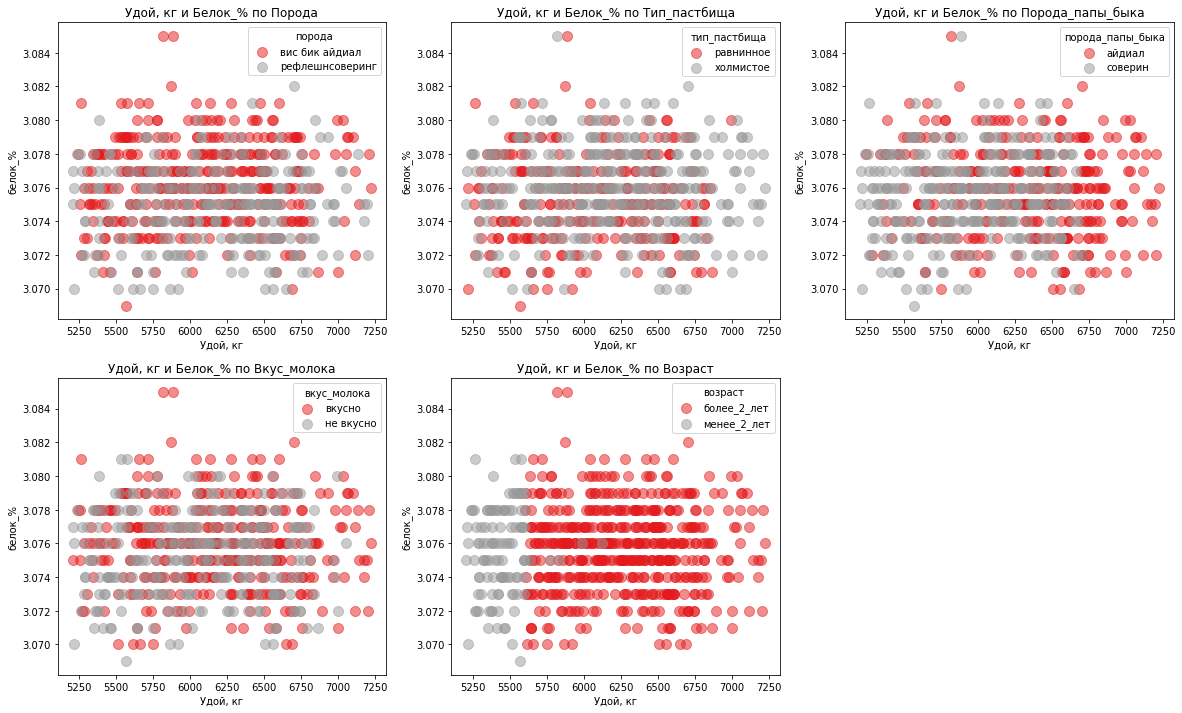

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [72]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,12))
categories = ['порода','тип_пастбища','порода_папы_быка','вкус_молока', 'возраст']
axes = axes.flatten()

for ax, category in zip(axes[:5], categories):
    scatterplot_category('белок_%', category , ax)

axes[5].axis('off')  
plt.pyplot.tight_layout() 
plt.pyplot.show();

На диограмме рассеяния признака Удой и признака белок не обнаружено связи, на что и показывает коофициент корреляции равный 0.06

#### ЭКЕ в квадрате 

посмотрим на коофициент корреляции целевого показателя и показателя ЭКЕ в квадрате , а так же рассморти диаграмму рассеяния

In [73]:
df_ferma_main['эке_в_квадрате'] = df_ferma_main['эке']**2
correlation_e = df_ferma_main['эке_в_квадрате'].corr(df_ferma_main['удой_кг'])
print(f'Коэффициент корреляции между ЭКЕ в квадрате и Удой: {correlation_e:.2f}')

Коэффициент корреляции между ЭКЕ в квадрате и Удой: 0.77


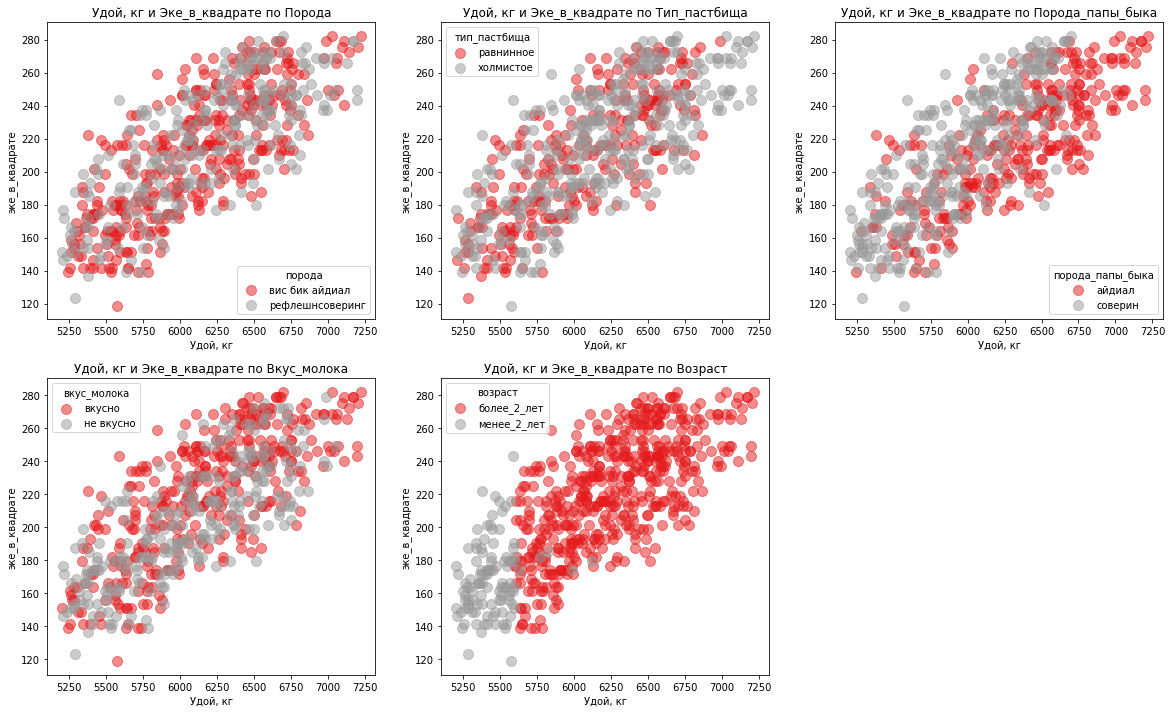

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [74]:
fig, axes = plt.pyplot.subplots(2,3, figsize=(20,12))
categories = ['порода','тип_пастбища','порода_папы_быка','вкус_молока', 'возраст']
axes = axes.flatten()

for ax, category in zip(axes[:5], categories):
    scatterplot_category('эке_в_квадрате', category , ax)

axes[5].axis('off')  
plt.pyplot.tight_layout() 
plt.pyplot.show();

Коофициент корреляции на стал выше при возведении признака ЭКЕ в квадрат , а так же на диаграмме рассеяния отчеливее видно линейную связь - для обучения модели МО будем использовать данный признак.

#### Вывод по диаграмма рассеяния

Мы провели анализ диаграмм рассеяния всех количественных признаков с целевым признаком Удой в разрезе по категориальным признакам и установили следующее: 

Мы выявили что между целевым признаком Удой сущетсвует линейные зависимости со следующими признаками:
1. Эке (показатель питательности корма коровы). Мы заметили, что признак Эке в квадрате показывает более явную линейну связь и коофициент корреляции выше  - по этому мы решили использовать данный новый признак для обучения модели МО
2. Cырой_протеин_г (содержание сырого протеина в корме (в граммах))

Мы выявили , что между целевым признаком Удой и СПО нет линейной зависимости . Надиаграмме рассеяния наблюдения сгруппированы в два кластера, причём значение СПО равное 0.92 является границей между кластерами. Мы создали новый признак спо_категориальный используя данную границу для обучения модели МО на новом факторе

Мы не выявили линейной зависимости между Удоем и жирностью, несмотря на высокий коофициент корреляции

Мы подтвердили, что зависимости Удоя от признака белок нет. Данный фактор можно не использовать для обучения модели МО.

Так же мы заметили, что
1. Объектам с породой папы быка айдиал характерен уровень ЭКЕ, сырой протеин, жирность  ниже чем для объектов с продой папы быка соверин при одинаковом уровне удоя, или же объектам с породой папы быка айдиал характерен уровень Удоя больше, чем для объектов с продой папы быка соверин при одинаковом уровне ЭКЕ, сырой протеин, жирность.
2. Объектам с возрастом более 2 лет характерен высокий уровень удоя при любом ( высоком или низком) уровне ЭКЕ, сырой протеин, спо, жирность,  а объектом с возрастом менее 2 лет характерене маленький уровень удоя при любом ( высоком или низком) уровне ЭКЕ, сырой протеин, спо, жирность.

### Вывод по главе 

Мы установили, что существует линейная связь между целевым признаком Удой и такми признаками как:
1. Эке/Эке в квадрате 
2. Cырой_протеин_г 

так же мы установили, что существует связь между целевым признаком Удой и таким признаком как:
1. Очень сильная корреляция удоя от возраста коровы
2. Сильная положительная связь между удоем и признаками СПО/СПО_категориальный,  содержание жиров в молоке
3. Средня связь такими категориальными признаками как порода папы быка/имя_папы_быка
4. Слабая связь с  тип пастбища, вкус молока, порода коровы, 

Так же мы установили, что для следующих признаков нет связи между Удоем и следущими признакми ( данные признаки не стоит учитывать для обучения модели МО ( линейной регрессии)):
1. белок


Установили, что существуют следующие виды связи для признака вкус молока: 

1. сильная корреляция с показателем спо
2. слабую связь с эке , тип пастбища , жирность , сырой протеин , возраст , удой 
5. Не обнаружено или крайне слабая связи между вкусом молока  и такими признаками как имя папы, белок, порода папы, порода коровы

Таким образом сделаем вывод, что между целевыми признаками и входными существует положительная связь, а так же существует мультиклассовая связь для категориальных данных для ряда признаков, хотя и есть признаки, которые никак не связаны с целевыми , такие как содержание белка и порода коровы.


Так же можно заметить, что существуют такие сильные связи между входными признаками как: 
1. эке и возраст ( коофициент корреляции 0.77) 
2. эке и жирность ( 0.72) 
3. спо и возраст ( 0.74)
4. порода папы быка и имя папы ( 0.98)

Данные связи не указвыают на мультикалениарность кроме последнего ( порода папы быка и имя папы ( 0.98)) - данный фактор как имя папы быка не следует использовать для обучения модели МО. 

## Обучение модели линейной регрессии

### Первая модель линейной регресии

В качестве целевого признака является Удой, кг . Для входных признаков будем использовать следующие признаки: 
1. эке -  в виду наличия линенйно связи с целевым признаком
2. сырой_протеин_г - в виду наличия линенйно связи с целевым признаком
3. спо - в виду сильной неленейной связи
4. порода - несмотря на слабую связь с целевым признаком, данный фактор можно использовать как входной 
5. тип_пастбища - в виду средней связи с целевым признаком
6. порода_папы_быка - в виду сильной связи с целевым признаком
7. возраст - в виду сильной связи с целевым признаком

Такие факторы как жирность и белок не слудет использовать для обучения модели в виду того, что данные признаки характеризуют молоко и  не имеют причинно - следственные связи между ними и уровнем удоя

#### Определим датафрейм для использования в обучении модели линейно регресии

In [75]:
df_fm = df_ferma_main[['эке','сырой_протеин_г','спо','порода','тип_пастбища','порода_папы_быка','возраст','удой_кг']]
X_fm = df_fm.drop('удой_кг', axis=1)
y_fm = df_fm['удой_кг']
display(X_fm.head())
display(y_fm.head())

,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,возраст
0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,более_2_лет
1,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,менее_2_лет
2,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,более_2_лет
3,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,более_2_лет
4,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,менее_2_лет


0    5863
1    5529
2    5810
3    5895
4    5302
Name: удой_кг, dtype: int64

#### Разбьем данные на тренировочную и тестовую выборки

In [76]:
RANDOM_STATE = 42

X_train_fm, X_test_fm, y_train_fm, y_test_fm = train_test_split(
    X_fm, 
    y_fm, 
    random_state=RANDOM_STATE
)

#### Закадируем категориальные признаки с помощью OneHotEncoder

In [77]:
cat_col_names_fm = ['порода','тип_пастбища','порода_папы_быка','возраст']

encoder_fm = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_fm = encoder_fm.fit_transform(X_train_fm[cat_col_names_fm])
X_test_ohe_fm = encoder_fm.transform(X_test_fm[cat_col_names_fm])

encoder_col_names_fm = encoder_fm.get_feature_names()

X_train_ohe_fm = pd.DataFrame(X_train_ohe_fm, columns=encoder_col_names_fm)
X_test_ohe_fm = pd.DataFrame(X_test_ohe_fm, columns=encoder_col_names_fm)

display(X_train_ohe_fm.head())
display(X_test_ohe_fm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет
0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0


,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет
0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0


#### Масштабируйте количественные признаки с помощью StandardScaler

In [78]:
num_col_names_fm = ['эке','сырой_протеин_г','спо']

scaler_fm = StandardScaler()
X_train_scaled_fm = scaler_fm.fit_transform(X_train_fm[num_col_names_fm])
X_test_scaled_fm = scaler_fm.transform(X_test_fm[num_col_names_fm])

X_train_scaled_fm = pd.DataFrame(X_train_scaled_fm, columns=num_col_names_fm)
X_test_scaled_fm = pd.DataFrame(X_test_scaled_fm, columns=num_col_names_fm)

display(X_train_scaled_fm.head())
display(X_test_scaled_fm.head())

,эке,сырой_протеин_г,спо
0,1.502378,1.079523,0.837130
1,-1.557270,-0.196920,-0.703660
2,0.125537,-1.386085,-1.011818
3,-0.103937,0.752230,0.837130
4,-1.098323,0.828598,-0.703660


,эке,сырой_протеин_г,спо
0,-0.486393,-0.813322,-1.011818
1,1.425887,0.026730,0.837130
2,-0.486393,-0.682405,-1.628134
3,-0.945340,-1.058792,-1.011818
4,0.584484,-1.413360,-0.703660


#### Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [79]:
X_train_fm = pd.concat([X_train_ohe_fm, X_train_scaled_fm], axis=1)
X_test_fm = pd.concat([X_test_ohe_fm, X_test_scaled_fm], axis=1)

display(X_train_fm.head())
display(X_test_fm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,эке,сырой_протеин_г,спо
0,1.0,1.0,1.0,0.0,1.502378,1.079523,0.837130
1,1.0,1.0,1.0,1.0,-1.557270,-0.196920,-0.703660
2,0.0,0.0,0.0,0.0,0.125537,-1.386085,-1.011818
3,0.0,1.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0.0,0.0,0.0,0.0,-1.098323,0.828598,-0.703660


,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,эке,сырой_протеин_г,спо
0,0.0,1.0,0.0,0.0,-0.486393,-0.813322,-1.011818
1,1.0,1.0,1.0,0.0,1.425887,0.026730,0.837130
2,1.0,1.0,1.0,1.0,-0.486393,-0.682405,-1.628134
3,0.0,0.0,1.0,0.0,-0.945340,-1.058792,-1.011818
4,0.0,1.0,1.0,0.0,0.584484,-1.413360,-0.703660


#### Обучим модель линейной регрессии на подготовленных данных

In [80]:
model_lr_fm  = LinearRegression()
model_lr_fm.fit(X_train_fm, y_train_fm)
predictions_fm = model_lr_fm.predict(X_test_fm)

#### Оценим качество модели на тестовой выборке

##### Коофициент детерминации R²

In [81]:
r2_fm = r2_score(y_test_fm, predictions_fm)
print(r2_fm)

0.7844078173416967


Модель объясняет 78.44% вариации целевой переменной, то есть первая модель достаточно хорошо предсказывает значения целевой переменной.

##### Проанализируем остатки с помощью графиков

count    157.000000
mean     -25.373286
std      208.615463
min     -632.814111
25%     -164.145968
50%      -34.294516
75%      108.696566
max      523.551641
Name: удой_кг, dtype: float64


<Figure size 720x432 with 0 Axes>

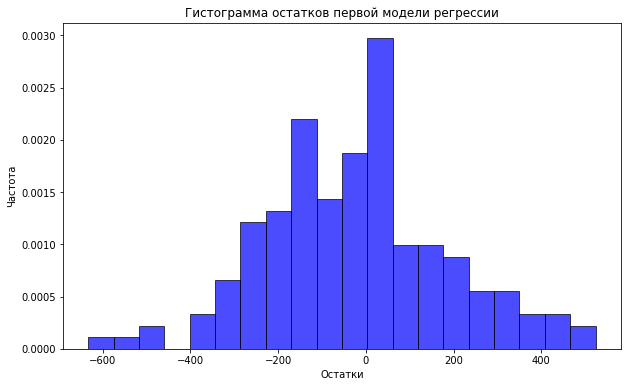

In [82]:
residuals_fm = y_test_fm - predictions_fm
print(residuals_fm.describe())
plt.pyplot.figure(figsize=(10, 6))

plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.hist(residuals_fm, bins=20, color='blue', edgecolor='black', alpha=0.7, density=True)
plt.pyplot.title("Гистограмма остатков первой модели регрессии")
plt.pyplot.xlabel("Остатки")
plt.pyplot.ylabel("Частота")
plt.pyplot.show()

На данном графике можно заметить, что остатки первой модели распределены нормально, однако есть смешение влево. Что означает, что прогнозы первой модели больше истинных значений ( перепрогнозирование)  

##### Посмотрим на дисперсию остатков

Дисперсия остатков равна 43243.21


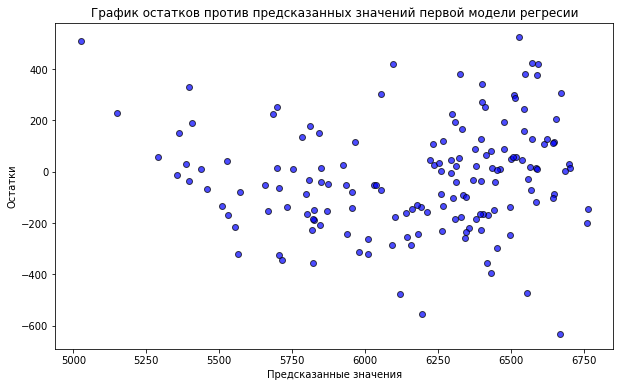

In [83]:
variance = np.var(residuals_fm)
print(f"Дисперсия остатков равна {variance:.2f}")

plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.scatter(predictions_fm, residuals_fm, color='blue', edgecolor='k', alpha=0.7)
plt.pyplot.title("График остатков против предсказанных значений первой модели регресии")
plt.pyplot.xlabel("Предсказанные значения")
plt.pyplot.ylabel("Остатки")
plt.pyplot.show()

На данном графике дисперсии остаток можно заметить чередование низкой и высокой дисперсии остатков ( рупор) , что означает, что модель может не учитывать неленейные зависимости 

##### Средняя обсолютная ошибка

In [84]:
mae_fm = mean_absolute_error(y_test_fm, predictions_fm)
print(f'Средняя обсолютная ошибка первой модели составляет  {mae_fm:.2f}')

Средняя обсолютная ошибка первой модели составляет  164.24


##### Средняя квадратичная ошибка 

In [85]:
mse_fm = mean_squared_error(y_test_fm, predictions_fm)
print(f'Средняя квадратичная ошибка первой модели составляет  {mse_fm:.2f}')

Средняя квадратичная ошибка первой модели составляет  43887.02


##### Корень средняя квадратичная ошибка 

In [86]:
rmse_fm = np.sqrt(mse_fm)
print(f'Корень средней квадратичной ошибки первой модели составляет  {rmse_fm:.2f}')

Корень средней квадратичной ошибки первой модели составляет  209.49


##### Вывод первой модели линейной регресии

Таким образом первая модель линейной регресии объясняет 78.44% вариации целевой переменной, то есть первая модель достаточно хорошо предсказывает значения целевой переменной.
Мы проанализировали остатки модели и выявили, что остатки первой модели распределены нормально, однако есть смешение влево, что означает, что прогнозы первой модели больше истинных значений ( перепрогнозирование) 
При исследовании дисперсии остаток так же было выявлено чередование низкой и высокой дисперсии остатков ( рупор) , что означает, что модель может не учитывать неленейные зависимости. MAE первой модели равно 163.62, MSE первой модели равно 43960.02, RMSE первой модели равно 209.67

### Вторая модель линейной регресии

Для второй модели используем вмето входного признака ЭКЕ признак ЭКЕ в квадрате, которые показывает большую линейность с целевым признаком, а так же вместо признака СПО используем его категориальный аналог

#### Определим датафрейм для использования в обучении модели линейно регресии

In [87]:
df_sm = df_ferma_main[['эке_в_квадрате','сырой_протеин_г','спо_категориальный','порода','тип_пастбища','порода_папы_быка','возраст','удой_кг']]
X_sm = df_sm.drop('удой_кг', axis=1)
y_sm = df_sm['удой_кг']
display(X_sm.head())
display(y_sm.head())

,эке_в_квадрате,сырой_протеин_г,спо_категориальный,порода,тип_пастбища,порода_папы_быка,возраст
0,201.64,1743,низкий,вис бик айдиал,равнинное,айдиал,более_2_лет
1,163.84,2138,низкий,вис бик айдиал,равнинное,соверин,менее_2_лет
2,196.00,1854,низкий,рефлешнсоверинг,холмистое,соверин,более_2_лет
3,153.76,2012,низкий,рефлешнсоверинг,холмистое,айдиал,более_2_лет
4,163.84,1675,низкий,вис бик айдиал,равнинное,соверин,менее_2_лет


0    5863
1    5529
2    5810
3    5895
4    5302
Name: удой_кг, dtype: int64

#### Разбьем данные на тренировочную и тестовую выборки

In [88]:
RANDOM_STATE = 42

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_sm, 
    y_sm, 
    random_state=RANDOM_STATE
)

#### Закадируем категориальные признаки с помощью OneHotEncoder

In [89]:
cat_col_names_sm = ['порода','тип_пастбища','порода_папы_быка','возраст', 'спо_категориальный']

encoder_sm = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_sm = encoder_sm.fit_transform(X_train_sm[cat_col_names_sm])
X_test_ohe_sm = encoder_sm.transform(X_test_sm[cat_col_names_sm])

encoder_col_names_sm = encoder_sm.get_feature_names()

X_train_ohe_sm = pd.DataFrame(X_train_ohe_sm, columns=encoder_col_names_sm)
X_test_ohe_sm = pd.DataFrame(X_test_ohe_sm, columns=encoder_col_names_sm)

display(X_train_ohe_sm.head())
display(X_test_ohe_sm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,x4_низкий
0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,x4_низкий
0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0


#### Масштабируйте количественные признаки с помощью StandardScaler

In [90]:
num_col_names_sm = ['эке_в_квадрате','сырой_протеин_г']

scaler_sm = StandardScaler()
X_train_scaled_sm = scaler_sm.fit_transform(X_train_sm[num_col_names_sm])
X_test_scaled_sm = scaler_sm.transform(X_test_sm[num_col_names_sm])

X_train_scaled_sm = pd.DataFrame(X_train_scaled_sm, columns=num_col_names_sm)
X_test_scaled_sm = pd.DataFrame(X_test_scaled_sm, columns=num_col_names_sm)

display(X_train_scaled_sm.head())
display(X_test_scaled_sm.head())

,эке_в_квадрате,сырой_протеин_г
0,1.577968,1.079523
1,-1.511438,-0.196920
2,0.082269,-1.386085
3,-0.150235,0.752230
4,-1.102358,0.828598


,эке_в_квадрате,сырой_протеин_г
0,-0.527089,-0.813322
1,1.490346,0.026730
2,-0.527089,-0.682405
3,-0.961737,-1.058792
4,0.561660,-1.413360


#### Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [91]:
X_train_sm = pd.concat([X_train_ohe_sm, X_train_scaled_sm], axis=1)
X_test_sm = pd.concat([X_test_ohe_sm, X_test_scaled_sm], axis=1)

display(X_train_sm.head())
display(X_test_sm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г
0,1.0,1.0,1.0,0.0,0.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,1.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,1.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,1.0,-1.102358,0.828598


,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г
0,0.0,1.0,0.0,0.0,1.0,-0.527089,-0.813322
1,1.0,1.0,1.0,0.0,0.0,1.490346,0.026730
2,1.0,1.0,1.0,1.0,1.0,-0.527089,-0.682405
3,0.0,0.0,1.0,0.0,1.0,-0.961737,-1.058792
4,0.0,1.0,1.0,0.0,1.0,0.561660,-1.413360


#### Обучим модель линейной регрессии на подготовленных данных

In [92]:
model_lr_sm  = LinearRegression()
model_lr_sm.fit(X_train_sm, y_train_sm)
predictions_sm = model_lr_sm.predict(X_test_sm)

#### Оценим качество модели на тестовой выборке

##### Коофициент детерминации R²

In [93]:
r2_sm = r2_score(y_test_sm, predictions_sm)
print(r2_sm)

0.8180879926867501


Модель объясняет 81.80% вариации целевой переменной, то есть вторая модель достаточно хорошо предсказывает значения целевой переменной.

##### Проанализируем остатки с помощью графиков

count    157.000000
mean     -24.372798
std      191.495294
min     -677.411878
25%     -147.957591
50%      -27.871259
75%       60.191976
max      475.458320
Name: удой_кг, dtype: float64


<Figure size 720x432 with 0 Axes>

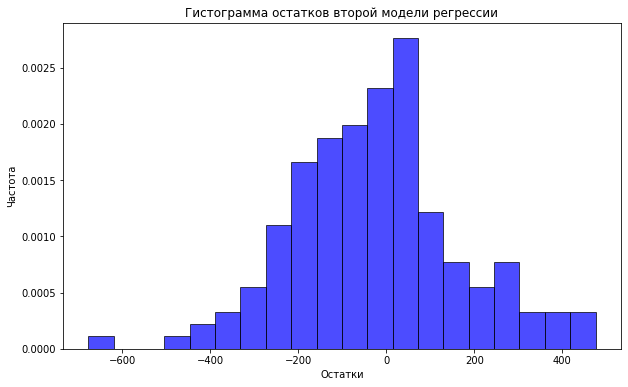

In [94]:
residuals_sm = y_test_sm - predictions_sm
print(residuals_sm.describe())
plt.pyplot.figure(figsize=(10, 6))

plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.hist(residuals_sm, bins=20, color='blue', edgecolor='black', alpha=0.7, density=True)
plt.pyplot.title("Гистограмма остатков второй модели регрессии")
plt.pyplot.xlabel("Остатки")
plt.pyplot.ylabel("Частота")
plt.pyplot.show()

На данном графике можно заметить, что остатки первой модели распределены нормально, однако есть смещение влево. Что означает, что прогнозы второй модели больше истинных значений ( перепрогнозирование), так же можно заметить один выброс слева, что может означать о наличии признака, который модель не учитывает.

##### Посмотрим на дисперсию остатков

Дисперсия остатков равна 36436.88


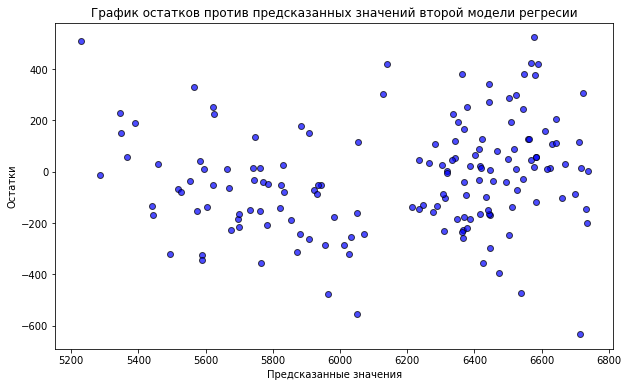

In [95]:
variance = np.var(residuals_sm)
print(f"Дисперсия остатков равна {variance:.2f}")

plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.scatter(predictions_sm, residuals_fm, color='blue', edgecolor='k', alpha=0.7)
plt.pyplot.title("График остатков против предсказанных значений второй модели регресии")
plt.pyplot.xlabel("Предсказанные значения")
plt.pyplot.ylabel("Остатки")
plt.pyplot.show()

На данном графике дисперсии остаток можно заметить чередование низкой и высокой дисперсии остатков ( рупор) , что означает, что модель может не учитывать неленейные зависимости . Однако данный рупор не такой очивидный, как у первой модели

##### Другие метрики

In [96]:
mae_sm = mean_absolute_error(y_test_sm, predictions_sm)
print(f'Средняя обсолютная ошибка второй модели составляет  {mae_sm:.2f}')

mse_sm = mean_squared_error(y_test_sm, predictions_sm)
print(f'Средняя квадратичная ошибка второй модели составляет  {mse_sm:.2f}')

rmse_sm = np.sqrt(mse_sm)
print(f'Корень средней квадратичной ошибки второй модели составляет  {rmse_sm:.2f}')

Средняя обсолютная ошибка второй модели составляет  149.04
Средняя квадратичная ошибка второй модели составляет  37030.91
Корень средней квадратичной ошибки второй модели составляет  192.43


##### Вывод второй модели линейной регресии

Таким образом вторая модель линейной регресии объясняет 81.80% вариации целевой переменной, то есть первая модель достаточно хорошо предсказывает значения целевой переменной.
Мы проанализировали остатки модели и выявили, что остатки первой модели распределены нормально, однако есть смешение влево, что означает, что прогнозы первой модели больше истинных значений ( перепрогнозирование), а так же выброс слева, что может означать о признаках, которая модель не учитывает 
При исследовании дисперсии остаток так же было выявлено чередование низкой и высокой дисперсии остатков ( рупор) , что означает, что модель может не учитывать неленейные зависимости, однако рупор второй модели не такой очивидный, как рупор первой модели. MAE второй модели равно 148.30, MSE второй модели равно 37257.54, RMSE второй модели равно 193.02

### Третья модель линейной регресии

Для создания третей модели линейной регресии включим в входные признаки такое признак как имя папы , однако как было ранее замечено, данный признак являеся коллениарным признаку порода_папы_быка, по этому исключим породу папы быка из входных признаков и заменим ее на имя папы

#### Определим датафрейм для использования в обучении модели линейно регресии

In [97]:
df_tm = df_ferma_main[['эке_в_квадрате','сырой_протеин_г','спо_категориальный','порода','тип_пастбища','имя_папы','возраст','удой_кг']]
X_tm = df_tm.drop('удой_кг', axis=1)
y_tm = df_tm['удой_кг']
display(X_tm.head())
display(y_tm.head())

,эке_в_квадрате,сырой_протеин_г,спо_категориальный,порода,тип_пастбища,имя_папы,возраст
0,201.64,1743,низкий,вис бик айдиал,равнинное,буйный,более_2_лет
1,163.84,2138,низкий,вис бик айдиал,равнинное,соловчик,менее_2_лет
2,196.00,1854,низкий,рефлешнсоверинг,холмистое,барин,более_2_лет
3,153.76,2012,низкий,рефлешнсоверинг,холмистое,буйный,более_2_лет
4,163.84,1675,низкий,вис бик айдиал,равнинное,барин,менее_2_лет


0    5863
1    5529
2    5810
3    5895
4    5302
Name: удой_кг, dtype: int64

#### Разбьем данные на тренировочную и тестовую выборки

In [98]:
RANDOM_STATE = 42

X_train_tm, X_test_tm, y_train_tm, y_test_tm = train_test_split(
    X_tm, 
    y_tm, 
    random_state=RANDOM_STATE
)

#### Закадируем категориальные признаки с помощью OneHotEncoder

In [99]:
cat_col_names_tm = ['порода','тип_пастбища','имя_папы','возраст', 'спо_категориальный']

encoder_tm = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_tm = encoder_tm.fit_transform(X_train_tm[cat_col_names_tm])
X_test_ohe_tm = encoder_tm.transform(X_test_tm[cat_col_names_tm])

encoder_col_names_tm = encoder_tm.get_feature_names()

X_train_ohe_tm = pd.DataFrame(X_train_ohe_tm, columns=encoder_col_names_tm)
X_test_ohe_tm = pd.DataFrame(X_test_ohe_tm, columns=encoder_col_names_tm)

display(X_train_ohe_tm.head())
display(X_test_ohe_tm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Масштабируйте количественные признаки с помощью StandardScaler

In [100]:
num_col_names_tm = ['эке_в_квадрате','сырой_протеин_г']

scaler_tm = StandardScaler()
X_train_scaled_tm = scaler_tm.fit_transform(X_train_tm[num_col_names_tm])
X_test_scaled_tm = scaler_tm.transform(X_test_tm[num_col_names_tm])

X_train_scaled_tm = pd.DataFrame(X_train_scaled_tm, columns=num_col_names_tm)
X_test_scaled_tm = pd.DataFrame(X_test_scaled_tm, columns=num_col_names_tm)

display(X_train_scaled_tm.head())
display(X_test_scaled_tm.head())

,эке_в_квадрате,сырой_протеин_г
0,1.577968,1.079523
1,-1.511438,-0.196920
2,0.082269,-1.386085
3,-0.150235,0.752230
4,-1.102358,0.828598


,эке_в_квадрате,сырой_протеин_г
0,-0.527089,-0.813322
1,1.490346,0.026730
2,-0.527089,-0.682405
3,-0.961737,-1.058792
4,0.561660,-1.413360


#### Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [101]:
X_train_tm = pd.concat([X_train_ohe_tm, X_train_scaled_tm], axis=1)
X_test_tm = pd.concat([X_test_ohe_tm, X_test_scaled_tm], axis=1)

display(X_train_tm.head())
display(X_test_tm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.577968,1.079523
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.511438,-0.196920
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.082269,-1.386085
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.102358,0.828598


,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.527089,-0.813322
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.490346,0.026730
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.527089,-0.682405
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.961737,-1.058792
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.561660,-1.413360


#### Обучим модель линейной регрессии на подготовленных данных

In [102]:
model_lr_tm  = LinearRegression()
model_lr_tm.fit(X_train_tm, y_train_tm)
predictions_tm = model_lr_tm.predict(X_test_tm)

#### Оценим качество модели на тестовой выборке

##### Коофициент детерминации R²

In [103]:
r2_tm = r2_score(y_test_tm, predictions_tm)
print(r2_tm)

0.8265123645098965


Модель объясняет 82.65% вариации целевой переменной, то есть вторая модель достаточно хорошо предсказывает значения целевой переменной.

##### Проанализируем остатки с помощью графиков

count    157.000000
mean     -17.118513
std      187.743088
min     -711.976902
25%     -139.478141
50%      -15.817371
75%       76.820483
max      438.780151
Name: удой_кг, dtype: float64


<Figure size 720x432 with 0 Axes>

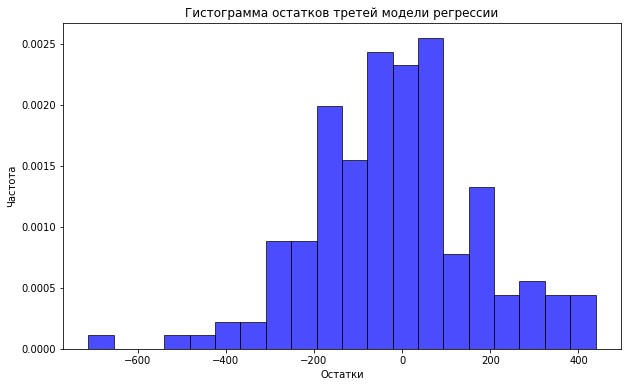

In [104]:
residuals_tm = y_test_tm - predictions_tm
print(residuals_tm.describe())
plt.pyplot.figure(figsize=(10, 6))

plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.hist(residuals_tm, bins=20, color='blue', edgecolor='black', alpha=0.7, density=True)
plt.pyplot.title("Гистограмма остатков третей модели регрессии")
plt.pyplot.xlabel("Остатки")
plt.pyplot.ylabel("Частота")
plt.pyplot.show()

На данном графике можно заметить, что остатки первой модели распределены нормально, однако есть смещение влево. Что означает, что прогнозы третей модели больше истинных значений ( перепрогнозирование), так же можно заметить один выброс слева, что может означать о наличии признака, который модель не учитывает. Смешение у данной модели является самым маленьким в сравнении с другими моделями

##### Посмотрим на дисперсию остатков

Дисперсия остатков равна 35022.96


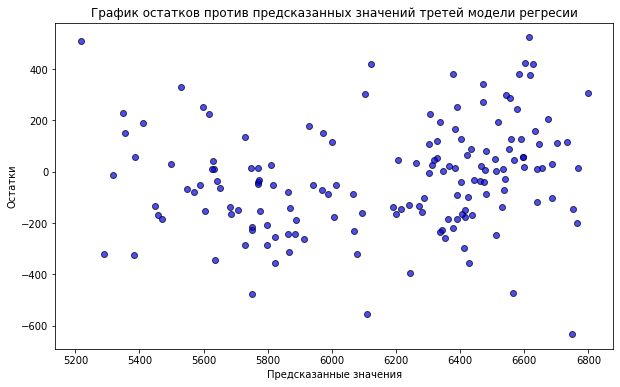

In [105]:
variance = np.var(residuals_tm)
print(f"Дисперсия остатков равна {variance:.2f}")

plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.scatter(predictions_tm, residuals_fm, color='blue', edgecolor='k', alpha=0.7)
plt.pyplot.title("График остатков против предсказанных значений третей модели регресии")
plt.pyplot.xlabel("Предсказанные значения")
plt.pyplot.ylabel("Остатки")
plt.pyplot.show()

На данном графике разброс десперсии выглядит нормальным .

##### Другие метрики

In [106]:
mae_tm = mean_absolute_error(y_test_tm, predictions_tm)
print(f'Средняя обсолютная ошибка третьей модели составляет  {mae_tm:.2f}')

mse_tm = mean_squared_error(y_test_tm, predictions_tm)
print(f'Средняя квадратичная ошибка третьей модели составляет  {mse_tm:.2f}')

rmse_tm = np.sqrt(mse_tm)
print(f'Корень средней квадратичной ошибки третьей модели составляет  {rmse_tm:.2f}')

Средняя обсолютная ошибка третьей модели составляет  144.64
Средняя квадратичная ошибка третьей модели составляет  35316.00
Корень средней квадратичной ошибки третьей модели составляет  187.93


##### Вывод третье модели линейной регресии

Таким образом третья модель линейной регресии объясняет 82.65% вариации целевой переменной, то есть первая модель достаточно хорошо предсказывает значения целевой переменной.
Мы проанализировали остатки модели и выявили, что остатки первой модели распределены нормально, однако есть смешение влево, что означает, что прогнозы первой модели больше истинных значений ( перепрогнозирование), а так же выброс слева, что может означать о признаках, которая модель не учитывает . Смешение влево у третье модели является самым маленьком в сравнеии с отсальными двумя моделями.
При исследовании дисперсии остаток не было выявлено аномалий. 
MAE третей модели равно 145.53, MSE второй модели равно 35632.88, RMSE второй модели равно 188.77

### Вывод по обучению модели линейной регресии

Таким образом, сравнивая три модели, можно заметить, что наиболее эффективной является третья модель:
1. коофициент детерминации является наибольшим из трех ( 82.65) 
2. отклонение от 0 на распределении остатков является минимальным ( -17.11) 
3. разброс дисперсии является нормальным
4. такие показатели как MAE, MSE, RMSE являются минимальными у третье модели ( 144.64, 35316.00, 187.93 соответственно) 

### Укажем доверительный интервал прогноза лучшей модели

Для того чтобы посчитать квантили ошибок (на 5% и 95%) и построить доверительный интервал с вероятностью 90%, нам нужно рассчитать значения, соответствующие этим квантилям.

In [107]:
lower_quantile = residuals_tm.quantile(0.05)
upper_quantile = residuals_tm.quantile(0.95)

print(f"10-й процентиль (нижняя граница): {lower_quantile:.4f}")
print(f"90-й процентиль (верхняя граница): {upper_quantile:.4f}")

10-й процентиль (нижняя граница): -277.7579
90-й процентиль (верхняя граница): 319.6773


С вероятностью 90 процентов значение ошибки третей модели будут ледать в промежутке от -277.75 до 319.67 кг Удоя

### Используем третью модель для решения задачи фермера

#### Добавим недостающие признаки

Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица) в квадрате , Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%.

In [108]:
display(df_cow_buy.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [109]:
df_cow_buy['эке'] = df_ferma_main['эке'].mean()*1.05
df_cow_buy['эке_в_квадрате'] = df_cow_buy['эке'] ** 2
df_cow_buy['сырой_протеин_г'] = df_ferma_main['сырой_протеин_г'].mean()*1.05
df_cow_buy['спо'] = df_ferma_main['спо'].mean()*1.05
df_cow_buy['спо_категориальный'] = df_cow_buy['спо'].apply(categorize)

#### Определим датафрейм для использования в обучении модели линейно регресии

In [110]:
X_buy = df_cow_buy[['эке_в_квадрате','сырой_протеин_г','спо_категориальный','порода','тип_пастбища','имя_папы','возраст']]
display(X_buy.head())

,эке_в_квадрате,сырой_протеин_г,спо_категориальный,порода,тип_пастбища,имя_папы,возраст
0,233.361138,2019.947532,высокий,вис бик айдиал,холмистое,геркулес,более_2_лет
1,233.361138,2019.947532,высокий,вис бик айдиал,равнинное,буйный,менее_2_лет
2,233.361138,2019.947532,высокий,рефлешнсоверинг,равнинное,барин,более_2_лет
3,233.361138,2019.947532,высокий,рефлешнсоверинг,холмистое,буйный,более_2_лет
4,233.361138,2019.947532,высокий,рефлешнсоверинг,равнинное,буйный,более_2_лет


#### Закадируем категориальные признаки с помощью OneHotEncoder

In [111]:
X_buy_ohe = encoder_tm.transform(X_buy[cat_col_names_tm])

encoder_col_names_buy = encoder_tm.get_feature_names()

X_buy_ohe = pd.DataFrame(X_buy_ohe, columns=encoder_col_names_buy)

display(X_buy_ohe.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Масштабируйте количественные признаки с помощью StandardScaler

In [112]:
X_buy_scaled = scaler_tm.transform(X_buy[num_col_names_tm])

X_buy_scaled = pd.DataFrame(X_buy_scaled, columns=num_col_names_tm)

display(X_buy_scaled.head())

,эке_в_квадрате,сырой_протеин_г
0,0.542248,0.517384
1,0.542248,0.517384
2,0.542248,0.517384
3,0.542248,0.517384
4,0.542248,0.517384


#### Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [113]:
X_buy = pd.concat([X_buy_ohe, X_buy_scaled], axis=1)

display(X_buy.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.542248,0.517384
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.542248,0.517384
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542248,0.517384
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.542248,0.517384
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.542248,0.517384


#### Найдем предсказания третей модели для данных коров для покупки 

In [114]:
predictions_buy = model_lr_tm.predict(X_buy)
df_cow_buy['predictions'] = predictions_buy
display(df_cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке,эке_в_квадрате,сырой_протеин_г,спо,спо_категориальный,predictions
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6608.443615
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6334.275064
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6281.140194
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6592.027874
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6543.028775
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6380.167370
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6608.443615
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6528.290493
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6281.140194
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6398.012445


In [115]:
print(df_cow_buy['predictions'].describe())

count      20.000000
mean     6443.066232
std       145.777777
min      6121.385582
25%      6337.701879
50%      6463.151469
75%      6578.644067
max      6608.443615
Name: predictions, dtype: float64


### Вывод по решению задачи фермера

Таким образом мы использовали третью модель для получения прогнозов по удоя коров, которых фермер рассматривает для покупки. Можно заметить , что прогноз удоя у всех объектов составляет больше 6000 кг молока. Среднее зачение удоя в полученных предсказаниях равно 6443 кг, минимальное значение равно 6121, а максимальное 6608

## Обучение модели логистической регрессии

Целевым признаком для модели логистической регресии будет категориальный признак 'Вкус молока', а входными признаками будут признаки, которые мы использовали для третьей модели линейной регресии плюс белок ( так как имеет слабый уровень корреляции)

#### Определим датафрейм для использования в обучении модели логистической регресии

In [116]:
df_logm = df_ferma_main[['эке_в_квадрате','сырой_протеин_г','спо_категориальный','порода','тип_пастбища','имя_папы','жирность_%','возраст','вкус_молока','белок_%']]
X_logm = df_logm.drop('вкус_молока', axis=1)
y_logm = df_logm['вкус_молока']
display(X_logm.head())
display(y_logm.head())

,эке_в_квадрате,сырой_протеин_г,спо_категориальный,порода,тип_пастбища,имя_папы,жирность_%,возраст,белок_%
0,201.64,1743,низкий,вис бик айдиал,равнинное,буйный,3.58,более_2_лет,3.076
1,163.84,2138,низкий,вис бик айдиал,равнинное,соловчик,3.54,менее_2_лет,3.079
2,196.00,1854,низкий,рефлешнсоверинг,холмистое,барин,3.59,более_2_лет,3.074
3,153.76,2012,низкий,рефлешнсоверинг,холмистое,буйный,3.40,более_2_лет,3.075
4,163.84,1675,низкий,вис бик айдиал,равнинное,барин,3.73,менее_2_лет,3.073


0       вкусно
1       вкусно
2    не вкусно
3    не вкусно
4       вкусно
Name: вкус_молока, dtype: object

#### Разбьем данные на тренировочную и тестовую выборки

In [117]:
RANDOM_STATE = 42

X_train_logm, X_test_logm, y_train_logm, y_test_logm = train_test_split(
    X_logm, 
    y_logm, 
    random_state=RANDOM_STATE
)

#### Закадируем категориальные признаки с помощью OneHotEncoder

In [118]:
cat_col_names_logm = ['порода','тип_пастбища','имя_папы','возраст', 'спо_категориальный']

encoder_logm = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_logm = encoder_logm.fit_transform(X_train_logm[cat_col_names_logm])
X_test_ohe_logm = encoder_logm.transform(X_test_logm[cat_col_names_logm])


encoder_col_names_logm = encoder_logm.get_feature_names()

X_train_ohe_logm = pd.DataFrame(X_train_ohe_logm, columns=encoder_col_names_logm)
X_test_ohe_logm = pd.DataFrame(X_test_ohe_logm, columns=encoder_col_names_logm)

y_train_logm = y_train_logm.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_logm = y_test_logm.apply(lambda x: 1 if x == 'вкусно' else 0)

display(X_train_ohe_logm.head())
display(X_test_ohe_logm.head())
display(y_train_logm.head())
display(y_test_logm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


507    1
382    1
586    0
196    1
327    1
Name: вкус_молока, dtype: int64

581    1
591    1
550    1
213    0
485    1
Name: вкус_молока, dtype: int64

#### Масштабируйте количественные признаки с помощью StandardScaler

In [119]:
num_col_names_logm = ['эке_в_квадрате','сырой_протеин_г','жирность_%','белок_%']

scaler_logm = StandardScaler()
X_train_scaled_logm = scaler_logm.fit_transform(X_train_logm[num_col_names_logm])
X_test_scaled_logm = scaler_logm.transform(X_test_logm[num_col_names_logm])

X_train_scaled_logm = pd.DataFrame(X_train_scaled_logm, columns=num_col_names_logm)
X_test_scaled_logm = pd.DataFrame(X_test_scaled_logm, columns=num_col_names_logm)

display(X_train_scaled_logm.head())
display(X_test_scaled_logm.head())

,эке_в_квадрате,сырой_протеин_г,жирность_%,белок_%
0,1.577968,1.079523,0.562532,-0.679069
1,-1.511438,-0.196920,-1.601817,-1.452568
2,0.082269,-1.386085,-2.563750,1.254677
3,-0.150235,0.752230,0.081565,1.254677
4,-1.102358,0.828598,0.201807,0.094429


,эке_в_квадрате,сырой_протеин_г,жирность_%,белок_%
0,-0.527089,-0.813322,0.201807,0.094429
1,1.490346,0.026730,0.622652,-1.065819
2,-0.527089,-0.682405,0.141686,0.094429
3,-0.961737,-1.058792,0.081565,-0.679069
4,0.561660,-1.413360,0.081565,0.094429


#### Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [120]:
X_train_logm = pd.concat([X_train_ohe_logm, X_train_scaled_logm], axis=1)
X_test_logm = pd.concat([X_test_ohe_logm, X_test_scaled_logm], axis=1)

display(X_train_logm.head())
display(X_test_logm.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г,жирность_%,белок_%
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.577968,1.079523,0.562532,-0.679069
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.511438,-0.196920,-1.601817,-1.452568
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.082269,-1.386085,-2.563750,1.254677
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.150235,0.752230,0.081565,1.254677
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.102358,0.828598,0.201807,0.094429


,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г,жирность_%,белок_%
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.527089,-0.813322,0.201807,0.094429
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.490346,0.026730,0.622652,-1.065819
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.527089,-0.682405,0.141686,0.094429
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.961737,-1.058792,0.081565,-0.679069
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.561660,-1.413360,0.081565,0.094429


#### Обучим модель логистической регрессии на подготовленных данных

In [121]:
clf = LogisticRegression()
clf = clf.fit(X_train_logm, y_train_logm)
y_pred = clf.predict(X_test_logm)

#### Оценим качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision

##### accuracy

In [122]:
acc = accuracy_score(y_test_logm, y_pred)
print('accuracy: ',round(acc ,3))

accuracy:  0.631


##### матрица ошибок

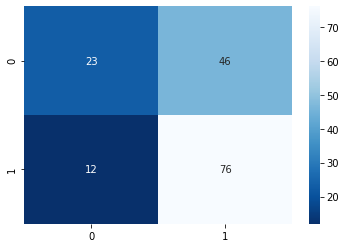

In [123]:
cm = confusion_matrix(y_test_logm, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

##### recall

In [124]:
recall = recall_score(y_test_logm, y_pred)
print('recall: ',round(recall ,3))

recall:  0.864


##### precision

In [125]:
precision = precision_score(y_test_logm, y_pred)
print('precision: ',round(precision,3))

precision:  0.623


Таким обращом мы вявили, что доля правильных предсказанний модели логистической регресии среди всех наблюдений составляет 63.1 %
    Данный показатель показывает на скорее низкий резултат модели и модель нуждается в улучшении

Precision показывает точность, с которой модель присваивает объектам класс 1, т.е. в 62 % случаев присвоенное значение 'вкусное' действительно явялется вкусным, а в 38 случаях присвоенное значение 'вкусное' на самом деле не является вкусным молоком
Recall показывает , смогла ли модель классификации присвоить класс 1 всем объектам этого класса, т.е в 86 % действительно вкусное молокао было предсказано моделью 'вкусное', а 14 % вкусного молока было предсказано 'невкусным'

Исходя из того, что фермеру важно, чтобы молоко было вкусным, мы можем сконйентрироваться на метрике precision ( ее увеличении), 
т.е. на увеличении доли вкусного молока, которым был присвое класс '1'. Ведь если невкусному молоку будет присвоен класс 1 - фермер понесет убытки. 
Высоким показателем recall можно принебречь, так как такая ошибка, как не присвоение класса 1 вкусному молоку (2 рода) , будет иметь меньше убытков, чем ошибка 1 рода 

Изменим порог классификации для увеличения метрики precision

In [126]:
y_proba = clf.predict_proba(X_test_logm)[:,1]

data_limit = pd.DataFrame(zip(y_test_logm, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data_limit.head()) 

     y_valid   y_proba
85         1  0.862046
66         1  0.841470
51         1  0.840207
110        1  0.838540
8          1  0.817105


Создадим список порогов

In [127]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
print(thresholds) 

[0.1, 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91]


Создадим расчётные столбцы с предсказаниями для каждого порога

In [128]:
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data_limit['y_pred_'+str(i)] = data_limit['y_proba'].apply(lambda x: 1 if x>=i else 0)


print(data_limit.head())

     y_valid   y_proba  y_pred_0.1  y_pred_0.19  y_pred_0.28  y_pred_0.37  \
85         1  0.862046           1            1            1            1   
66         1  0.841470           1            1            1            1   
51         1  0.840207           1            1            1            1   
110        1  0.838540           1            1            1            1   
8          1  0.817105           1            1            1            1   

     y_pred_0.46  y_pred_0.55  y_pred_0.64  y_pred_0.73  y_pred_0.82  \
85             1            1            1            1            1   
66             1            1            1            1            1   
51             1            1            1            1            1   
110            1            1            1            1            1   
8              1            1            1            1            0   

     y_pred_0.91  
85             0  
66             0  
51             0  
110            0  
8        

Посмотрим на изменение метрики recall при разных порогах

In [129]:
for i in thresholds:
    print(f'Значение recall при пороге {i} равно {recall_score(data_limit["y_valid"], data_limit["y_pred_" + str(i)])}')


Значение recall при пороге 0.1 равно 1.0
Значение recall при пороге 0.19 равно 1.0
Значение recall при пороге 0.28 равно 1.0
Значение recall при пороге 0.37 равно 0.9318181818181818
Значение recall при пороге 0.46 равно 0.8863636363636364
Значение recall при пороге 0.55 равно 0.8409090909090909
Значение recall при пороге 0.64 равно 0.625
Значение recall при пороге 0.73 равно 0.32954545454545453
Значение recall при пороге 0.82 равно 0.045454545454545456
Значение recall при пороге 0.91 равно 0.0


Посмотрим на изменение метрики precision при разных порогах

In [130]:
for i in thresholds:
    print(f'Значение precision при пороге {i} равно {precision_score(data_limit["y_valid"], data_limit["y_pred_" + str(i)])}')

Значение precision при пороге 0.1 равно 0.5605095541401274
Значение precision при пороге 0.19 равно 0.5605095541401274
Значение precision при пороге 0.28 равно 0.5641025641025641
Значение precision при пороге 0.37 равно 0.5655172413793104
Значение precision при пороге 0.46 равно 0.5954198473282443
Значение precision при пороге 0.55 равно 0.6548672566371682
Значение precision при пороге 0.64 равно 0.7746478873239436
Значение precision при пороге 0.73 равно 0.8285714285714286
Значение precision при пороге 0.82 равно 1.0
Значение precision при пороге 0.91 равно 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


В виду того, что фремеру важно получить вкусное молоко, установим порог классификации равный 0.73, в таком случае уровень precision будет равен 82 процентов, а уровень recall будет равен  33 - это позволит  минимизировать риски купить корову с невкусным молоком

Посмотрим на уровень accurcy при порогу равном 0.73

In [131]:
acc_73 = accuracy_score(data_limit["y_valid"], data_limit["y_pred_0.73"])
print('accuracy_0.73: ',round(acc_73 ,3))

accuracy_0.73:  0.586


Таким образом  accuracy уменьшилось до 58.6 %, что позволяет предположить, что в половине случаев модель будет предсказывать верное качества молока и в то же время минимизировать покупку невкусного молокка

### Используем модель логистической регресии для решения задачи фермера

#### Переименуем названия некоторых столбцов

In [132]:
display(df_cow_buy.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке,эке_в_квадрате,сырой_протеин_г,спо,спо_категориальный,predictions
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6608.443615
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6334.275064
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6281.140194
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6592.027874
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6543.028775


In [133]:
df_cow_buy = df_cow_buy.rename(columns={'текущий_уровень_белок_%':'белок_%','текущая_жирность_%':'жирность_%'})

#### Определим датафрейм для использования в обучении модели логиcтичекой регресии

In [134]:
X_buy_log = df_cow_buy[['эке_в_квадрате','сырой_протеин_г','спо_категориальный','порода','тип_пастбища','имя_папы','жирность_%','возраст','белок_%']]
display(X_buy_log.head())

,эке_в_квадрате,сырой_протеин_г,спо_категориальный,порода,тип_пастбища,имя_папы,жирность_%,возраст,белок_%
0,233.361138,2019.947532,высокий,вис бик айдиал,холмистое,геркулес,3.58,более_2_лет,3.076
1,233.361138,2019.947532,высокий,вис бик айдиал,равнинное,буйный,3.54,менее_2_лет,3.081
2,233.361138,2019.947532,высокий,рефлешнсоверинг,равнинное,барин,3.59,более_2_лет,3.074
3,233.361138,2019.947532,высокий,рефлешнсоверинг,холмистое,буйный,3.40,более_2_лет,3.061
4,233.361138,2019.947532,высокий,рефлешнсоверинг,равнинное,буйный,3.64,более_2_лет,3.074


#### Закадируем категориальные признаки с помощью OneHotEncoder

In [135]:
X_buy_log_ohe = encoder_logm.transform(X_buy_log[cat_col_names_logm])

X_buy_log_ohe = pd.DataFrame(X_buy_log_ohe, columns=encoder_col_names_logm)

display(X_buy_log_ohe.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Масштабируйте количественные признаки с помощью StandardScaler

In [136]:
X_buy_log_scaled = scaler_logm.transform(X_buy_log[num_col_names_logm])

X_buy_log_scaled = pd.DataFrame(X_buy_log_scaled, columns=num_col_names_logm)

display(X_buy_log_scaled.head())

,эке_в_квадрате,сырой_протеин_г,жирность_%,белок_%
0,0.542248,0.517384,-0.158918,0.094429
1,0.542248,0.517384,-0.399401,2.028176
2,0.542248,0.517384,-0.098797,-0.679069
3,0.542248,0.517384,-1.241093,-5.706810
4,0.542248,0.517384,0.201807,-0.679069


#### Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [137]:
X_buy_log = pd.concat([X_buy_log_ohe, X_buy_log_scaled], axis=1)

display(X_buy_log.head())

,x0_рефлешнсоверинг,x1_холмистое,x2_буйный,x2_геркулес,x2_соловчик,x3_менее_2_лет,x4_низкий,эке_в_квадрате,сырой_протеин_г,жирность_%,белок_%
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.542248,0.517384,-0.158918,0.094429
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.542248,0.517384,-0.399401,2.028176
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542248,0.517384,-0.098797,-0.679069
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.542248,0.517384,-1.241093,-5.706810
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.542248,0.517384,0.201807,-0.679069


#### Получим предсказания модели при пороге равном 0.82

In [138]:
y_proba_buy = clf.predict_proba(X_buy_log)[:,1]
df_cow_buy['y_pred'] = y_proba_buy
df_cow_buy['вкус_молока'] = df_cow_buy['y_pred'].apply(lambda x: 'вкусное' if x >= 0.73 else 'не_вкусное')
display(df_cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке,эке_в_квадрате,сырой_протеин_г,спо,спо_категориальный,predictions,y_pred,вкус_молока
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6608.443615,0.707751,не_вкусное
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6334.275064,0.668182,не_вкусное
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6281.140194,0.572852,не_вкусное
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6592.027874,0.363267,не_вкусное
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6543.028775,0.555484,не_вкусное
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6380.167370,0.107310,не_вкусное
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6608.443615,0.707751,не_вкусное
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6528.290493,0.667825,не_вкусное
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6281.140194,0.572852,не_вкусное
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6398.012445,0.742134,вкусное


Таким образом заметим, что существует одна корова с вкусным молоком под индексом 9 , удой у данной коровы составляет 6358 кг, что выше целевого порога. Можно рекомендовать данный объект к покупке.

### Вывод по главе 

Целевым признаком для модели логистической регресии будет категориальный признак 'Вкус молока', а входными признаками будут признаки, которые мы использовали для третьей модели линейной регресии плюс белок ( так как имеет слабый уровень корреляции)

Мы установили, что оптимальным вариантом порога классификации будет являться порог равный 0.73 , который позволит свести риски покупки коровы с невскусным молоком к нулю

## Итоговые выводы

Мы получили данные о коровах фермера, имена их отцов и коров на ферме 

Мы провели предобработку данных и сделали следующие поправки в данных:
1. Првиели имена столбцов к нижнему регистру, а так же заменили пробелы и запятые в названиях на '_' 
2. Изменили типы данных для количественных признаков с object на float 
3. Нашли неявные дубликаты в признаках и заменили их 
4. Нашли явыне дубликаты в таблице df_ferma_main и удалили их 
5. Все категориальные данные привели к нижнему регистру

Так же мы провели исслеовательский анализ данных и выявили следующее:
для данных в датафрейме df_ferma_main:

В признаке Удой, кг был обнаружен один аномальный объект, было решено его удалить из данных
В некоторых признаках было выявлено небольшое количествно аномалий, которые было решено оставить и не удалять: жирность%, белок%

Можно сотсавить портрет типичного объекта в стаде фермера на текущий момент. Это объект с:

1. Показателем массы молока, которую корова даёт в год (в килограммах) в промежутке от 5749 до 6501.
2. Показателем питательности корма коровы в промежутке от 13.5 до 16.8
3. Показателем содержания сырого протеина в корме (в граммах) от 1771 до 2062
4. Показателем отношение сахара к протеину в корме коровы 0.89 до 0.94
5. Показателем содержание жиров в молоке (в процентах) от 3.69 до 3.72
6. Показателем содержание белков в молоке (в процентах) от 3.074 до 3.077
7. Показателем породы равным вис бик айдиал или рефлешнсоверинг
8. Показателем тип пастбища равным холмистое или равнинное
9. Показателем попрода папы равным айдиал или соверин
10. Показателем вкус молока в большинстве случаев - вкусно
11. Показатель возраст в большенстве случаев равным - более 2 лет
12. Показатель имя_папы в большенстве случаев равным - барин или буйный

для данных в датафрейме df_cow_buy:

Аномалий не обнаружено. Объекты в категориальные призаках совпадают с объектами из категориальных признаков основной таблици, количественные признаки находятся в диапазонах подобных диапазноам основной таблици

Мы провели корреляционный анализ и установили следующее:

существует следующие виды связи для признака удой: 

1. очень сильная корреляция удоя от возраста объекта (чем старше объект, тем больше удоя)
2. сильная положительная связь между удоем и такими количественными признаками, как показатель питательности корма коровы, отношение сахара к протеину в корме коровы,  содержание жиров в молоке (в процентах);
3. средня связь между удоем и таким количественным признаком как  содержание сырого протеина в корме, и такими категориальными признаками как порода папы быка (  для породы папы_быка айдиал характерная больший удой, чем для породы папы соверин) , имя папы быка (таким отцов как буйный, геркулес характерны коровы с большим удоем, чем для пап соловчик и барин)
4. слабая связь существует между удоем и такими категориальными признаками как тип пастбища (Холмистому типу пастбища харкетрен больший удой молока) и вкус молока (вкусному молоку характерен больший удой) 
5. Не обнаружено связи между удоем и такими признаками как порода коровы и содержание белков в молоке


существует следующие виды связи для признака вкус молока: 

1. сильная корреляция вкуса молока от показателем спо (чем выще показатель отношения сахара к протеину в корме коровы, тем вкуснее молко) 
2. слабую связь между вкусом молока и такими признаками как: эке (чем выше показатель питательности корма коровы, тем вкуснее молоко), тип пастбища (типу пастбища холмистое характерно вкусное молоко, чем равнистое), жирность (чем выше показатель содержание жиров в молоке , тем вкуснее молоко), сырой протеин (чем выше показатель содержание сырого протеина в корме , тем вкуснее молоко),  возраст (чем старше корова, тем вкуснее молоко), удой (вкусному молоку характерен больший удой) 
5. Не обнаружено или крайне слабая связи между вкусом молока  и такими признаками как имя папы, белок, порода папы, порода коровы, 

Таким образом сделаем вывод, что между целевыми признаками и входными существует положительная связь, а так же существует мультиклассовая связь для категориальных данных для ряда признаков, хотя и есть признаки, которые никак не связаны с целевыми , такие как содержание белка и порода коровы.
Так же можно заметить, что существуют такие сильные связи между входными признаками как: 
1. эке и возраст ( коофициент корреляции 0.77) 
2. эке и жирность ( 0.72) 
3. спо и возраст ( 0.74)
4. порода папы быка и имя папы ( 0.98)

Данные связи не указвыают на мультикалениарность кроме последнего ( порода папы быка и имя папы ( 0.98)) - данный фактор как имя папы быка не следует использовать для обучения модели МО. 


Мы провели обучении момдели линейной регресии и установлили, что третья модель является наиболле оптимальной для решения задачи фермера. Мы спрогнозировали удой у коров и выяснили, что все коровы к расмотрению на покупку имеет удой выше 6000 литров

Так же мы провели обучение модели логистической регресии и установлили, что только одна корова будет иметь вкусное молоко .

Таким образом объект ниже является оптимальным вариантом для покупки фермера

In [139]:
display(df_cow_buy.query('вкус_молока == "вкусное"'))

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке,эке_в_квадрате,сырой_протеин_г,спо,спо_категориальный,predictions,y_pred,вкус_молока
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.4,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,высокий,6398.012445,0.742134,вкусное
